In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [14]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

#Сохраняем колонку 'Id'
train_ID = train['Id']
test_ID = test['Id']

# Теперь отбросываем столбец 'Id', так как он не нужен для процесса предсказания.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Объединяем два массива данных

ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train.SalePrice.values

# Объединяем два массива данных
df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)

In [15]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [17]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Text(0.5, 1.0, 'Missing values heatmap')

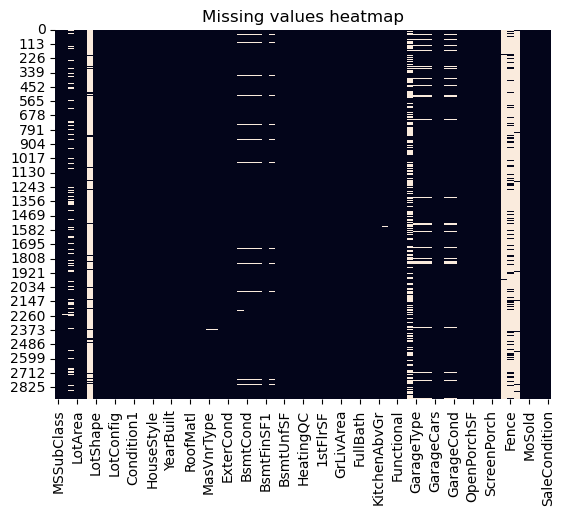

In [59]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

/tmp/ipykernel_31/3783162187.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

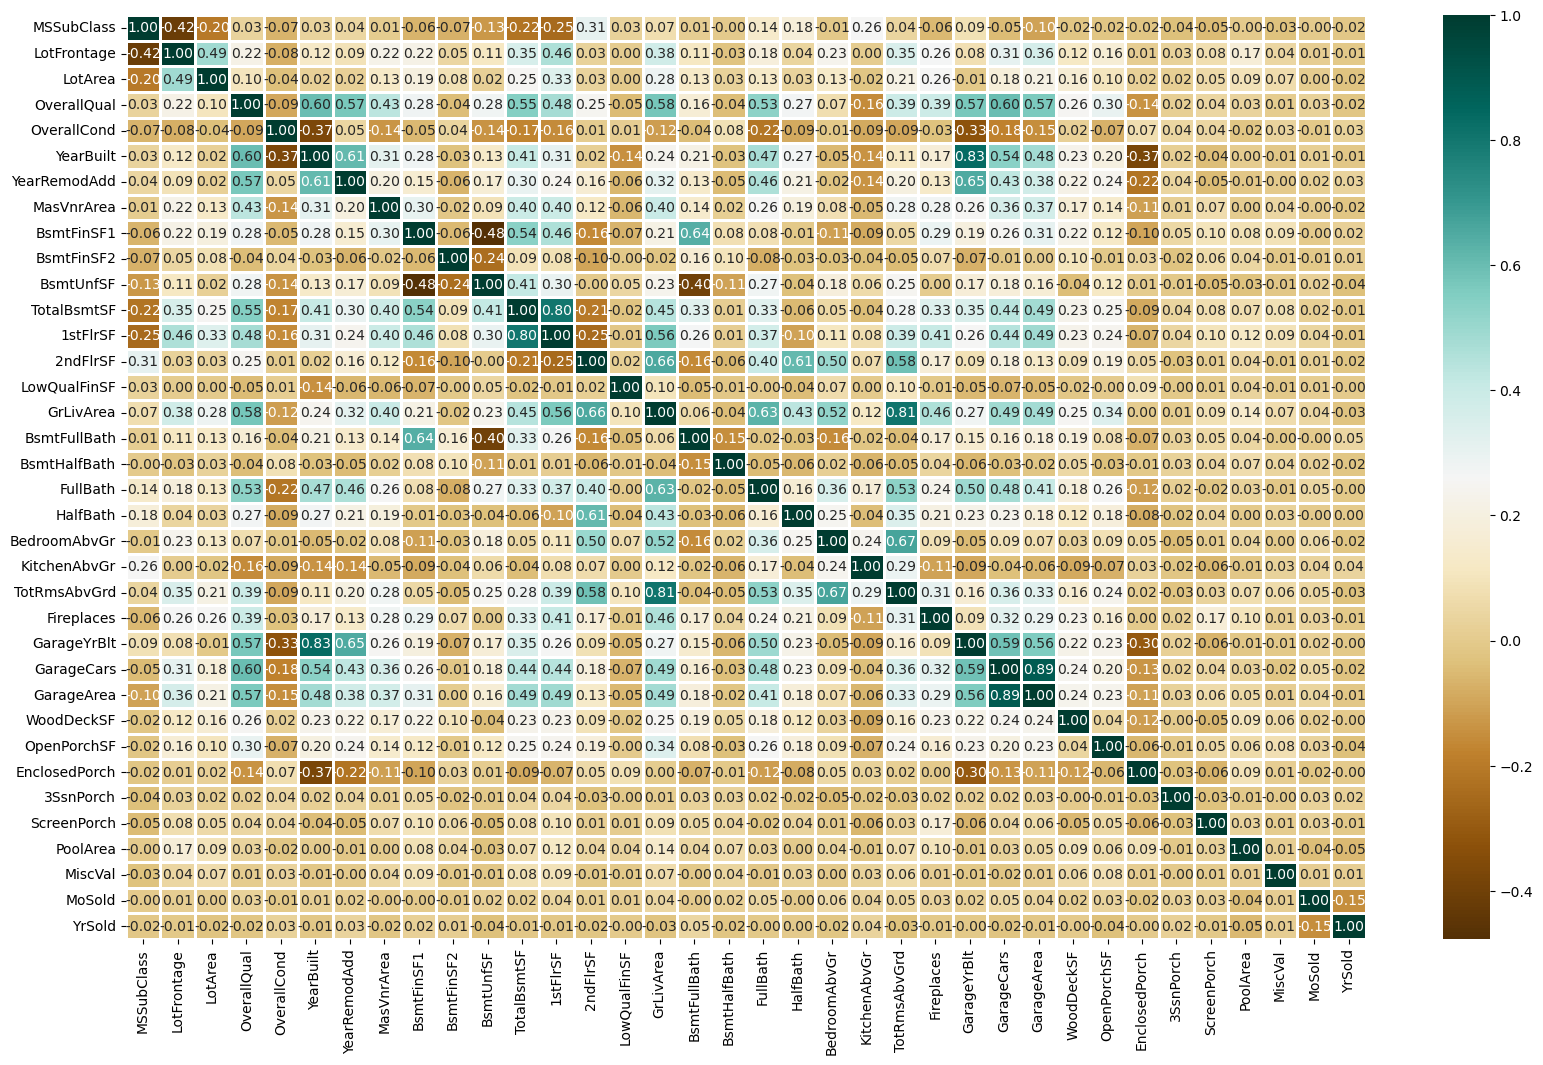

In [60]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [18]:
df=df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [19]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 39
Integer variables: 25
Float variables: 11


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

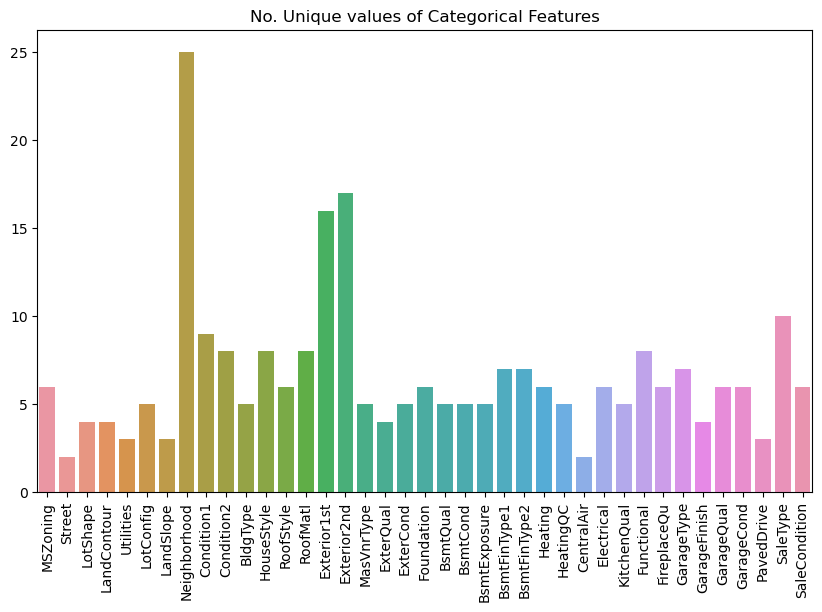

In [63]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

/tmp/ipykernel_32/2973226960.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


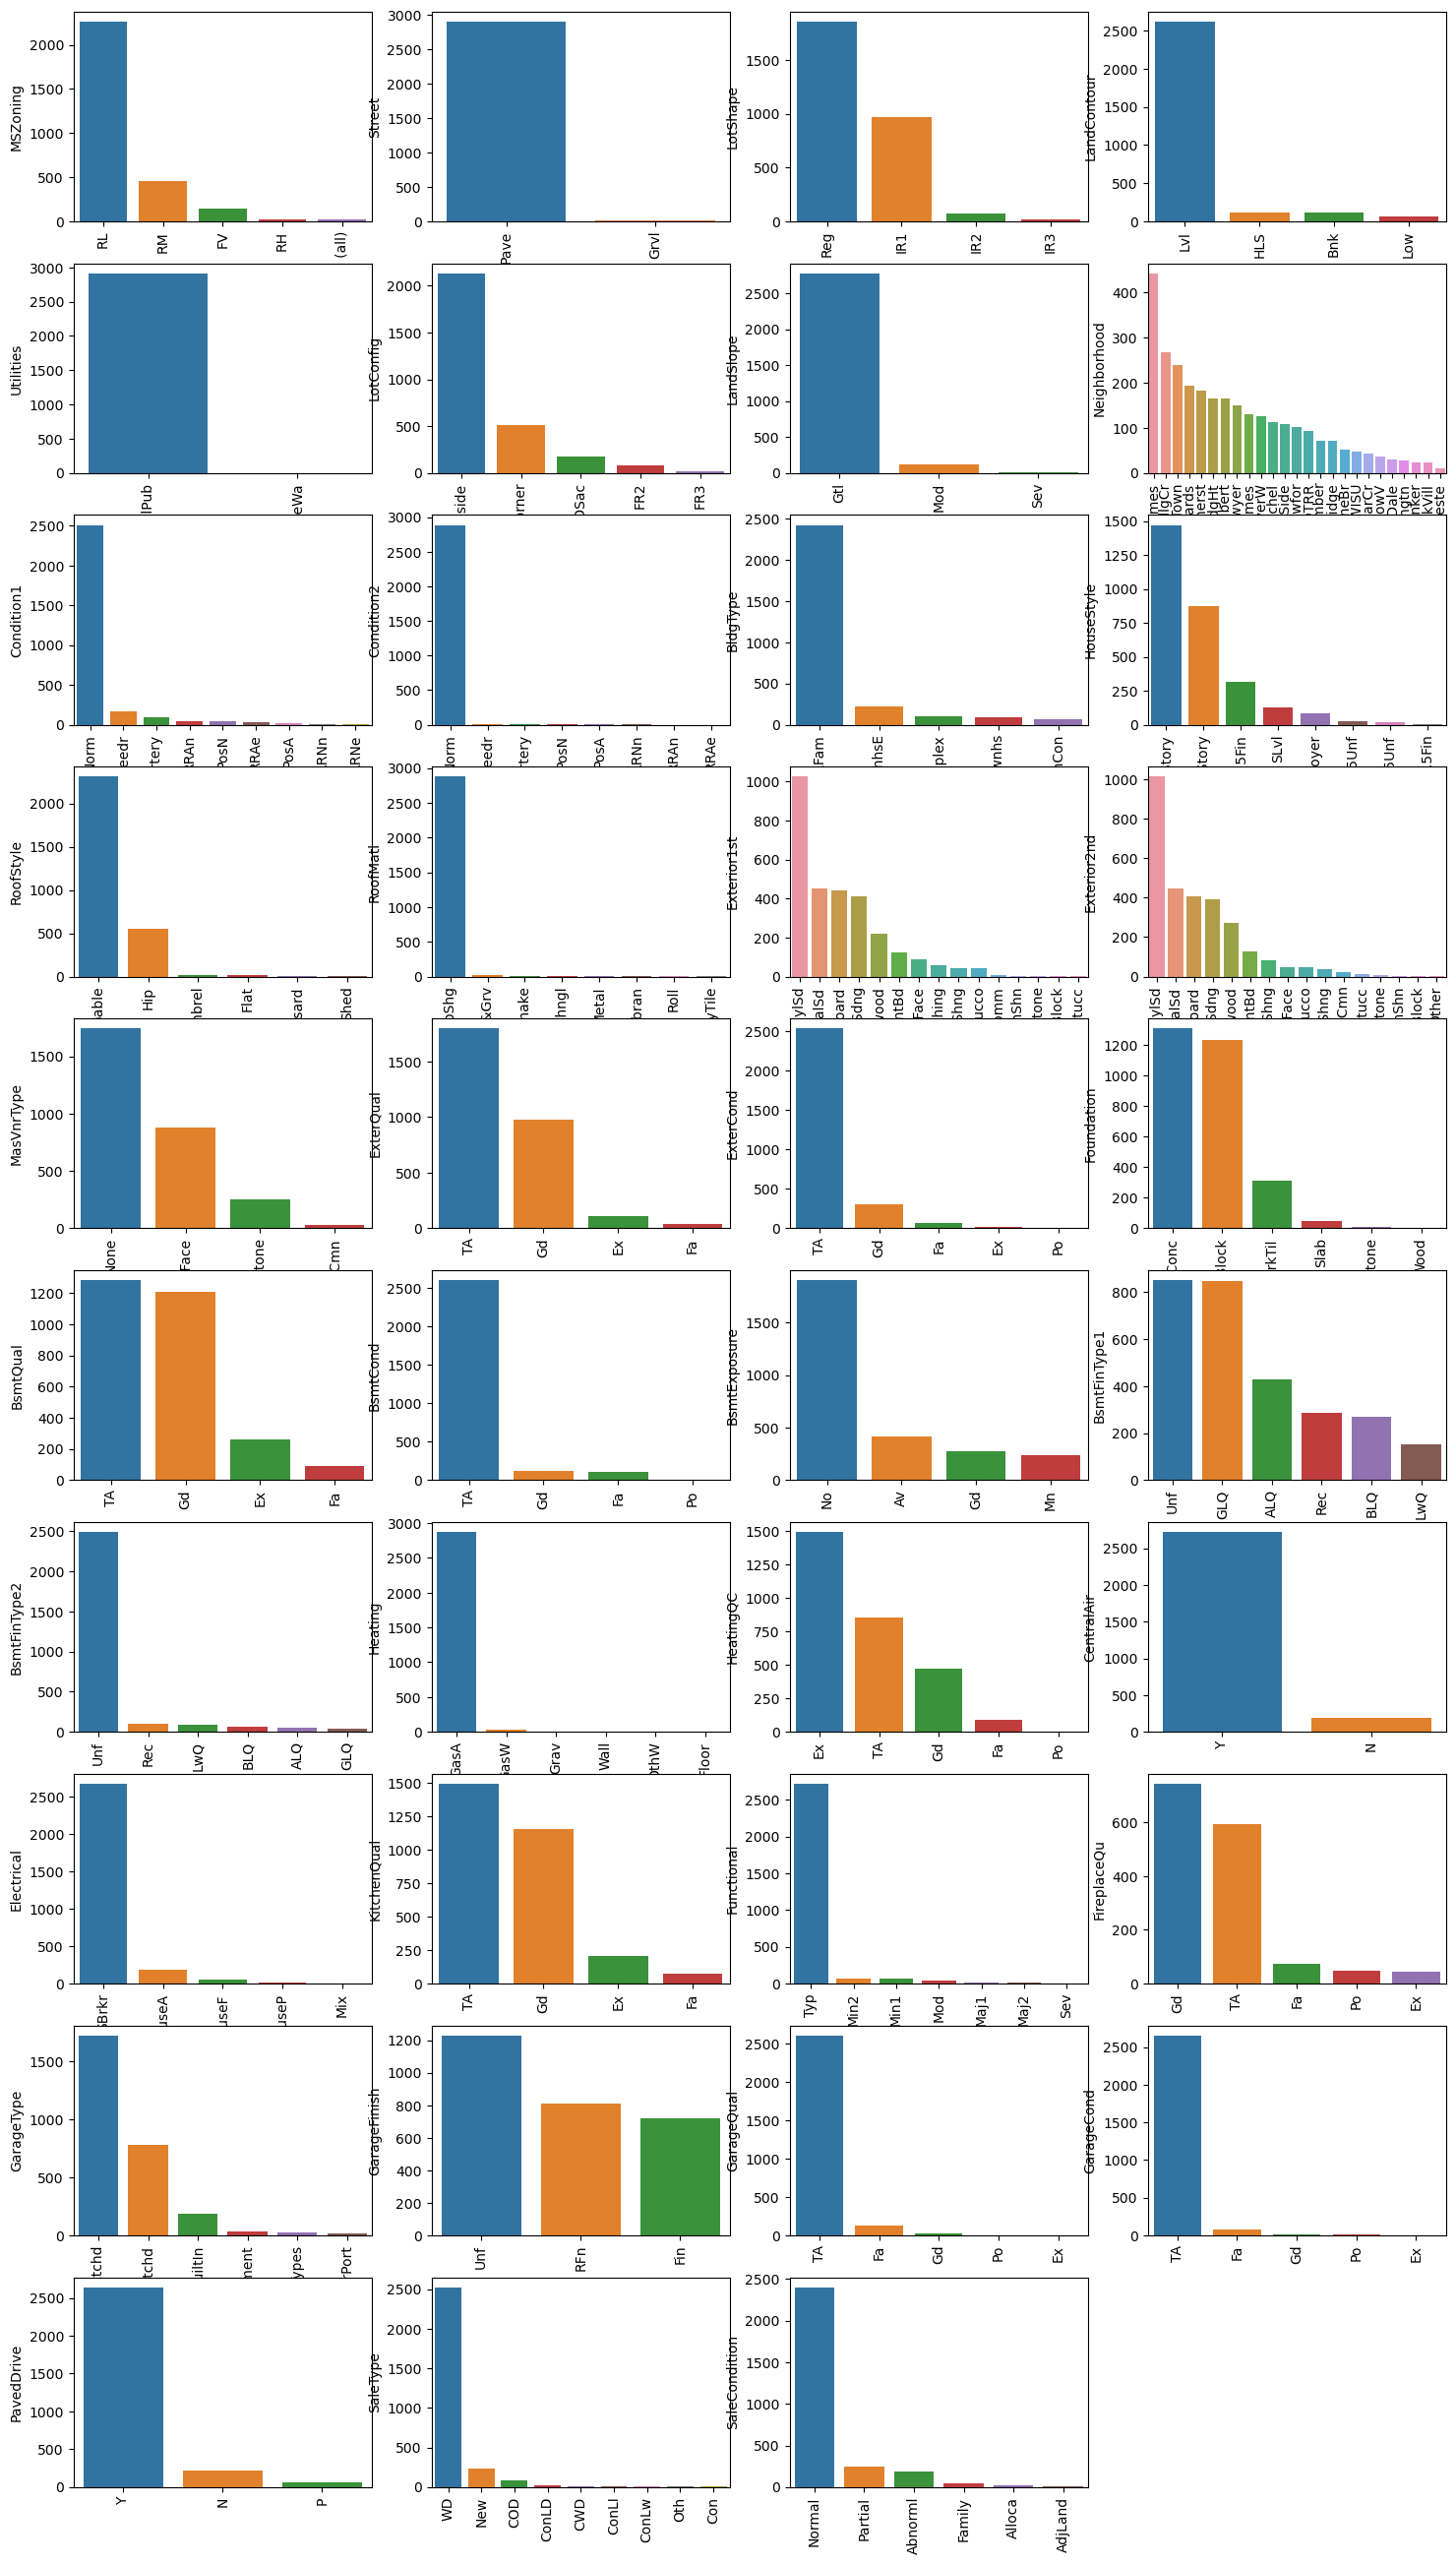

In [20]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

<Axes: title={'center': 'No. Unique values of Integer Features'}>

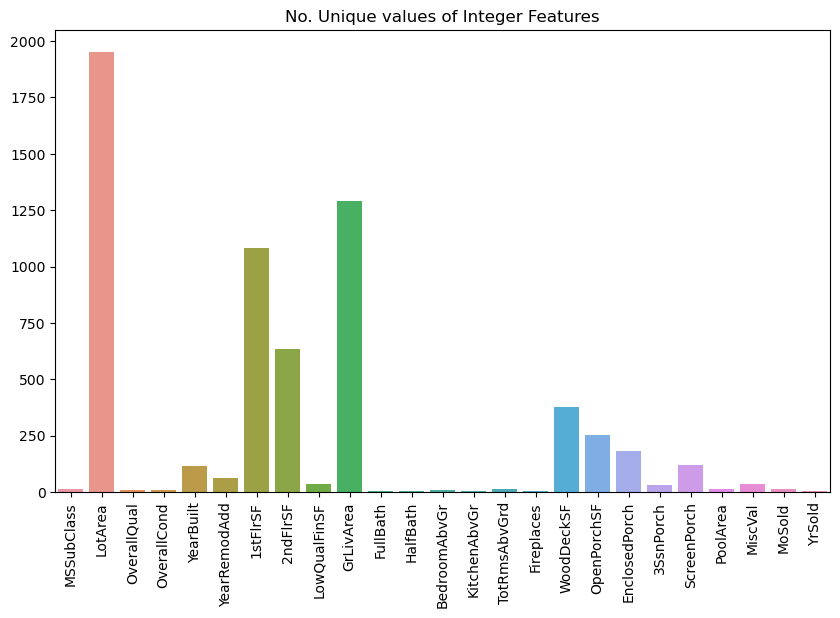

In [65]:
unique_values = []
for col in num_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Integer Features')
plt.xticks(rotation=90)
sns.barplot(x=num_cols,y=unique_values)

/tmp/ipykernel_31/2014275014.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


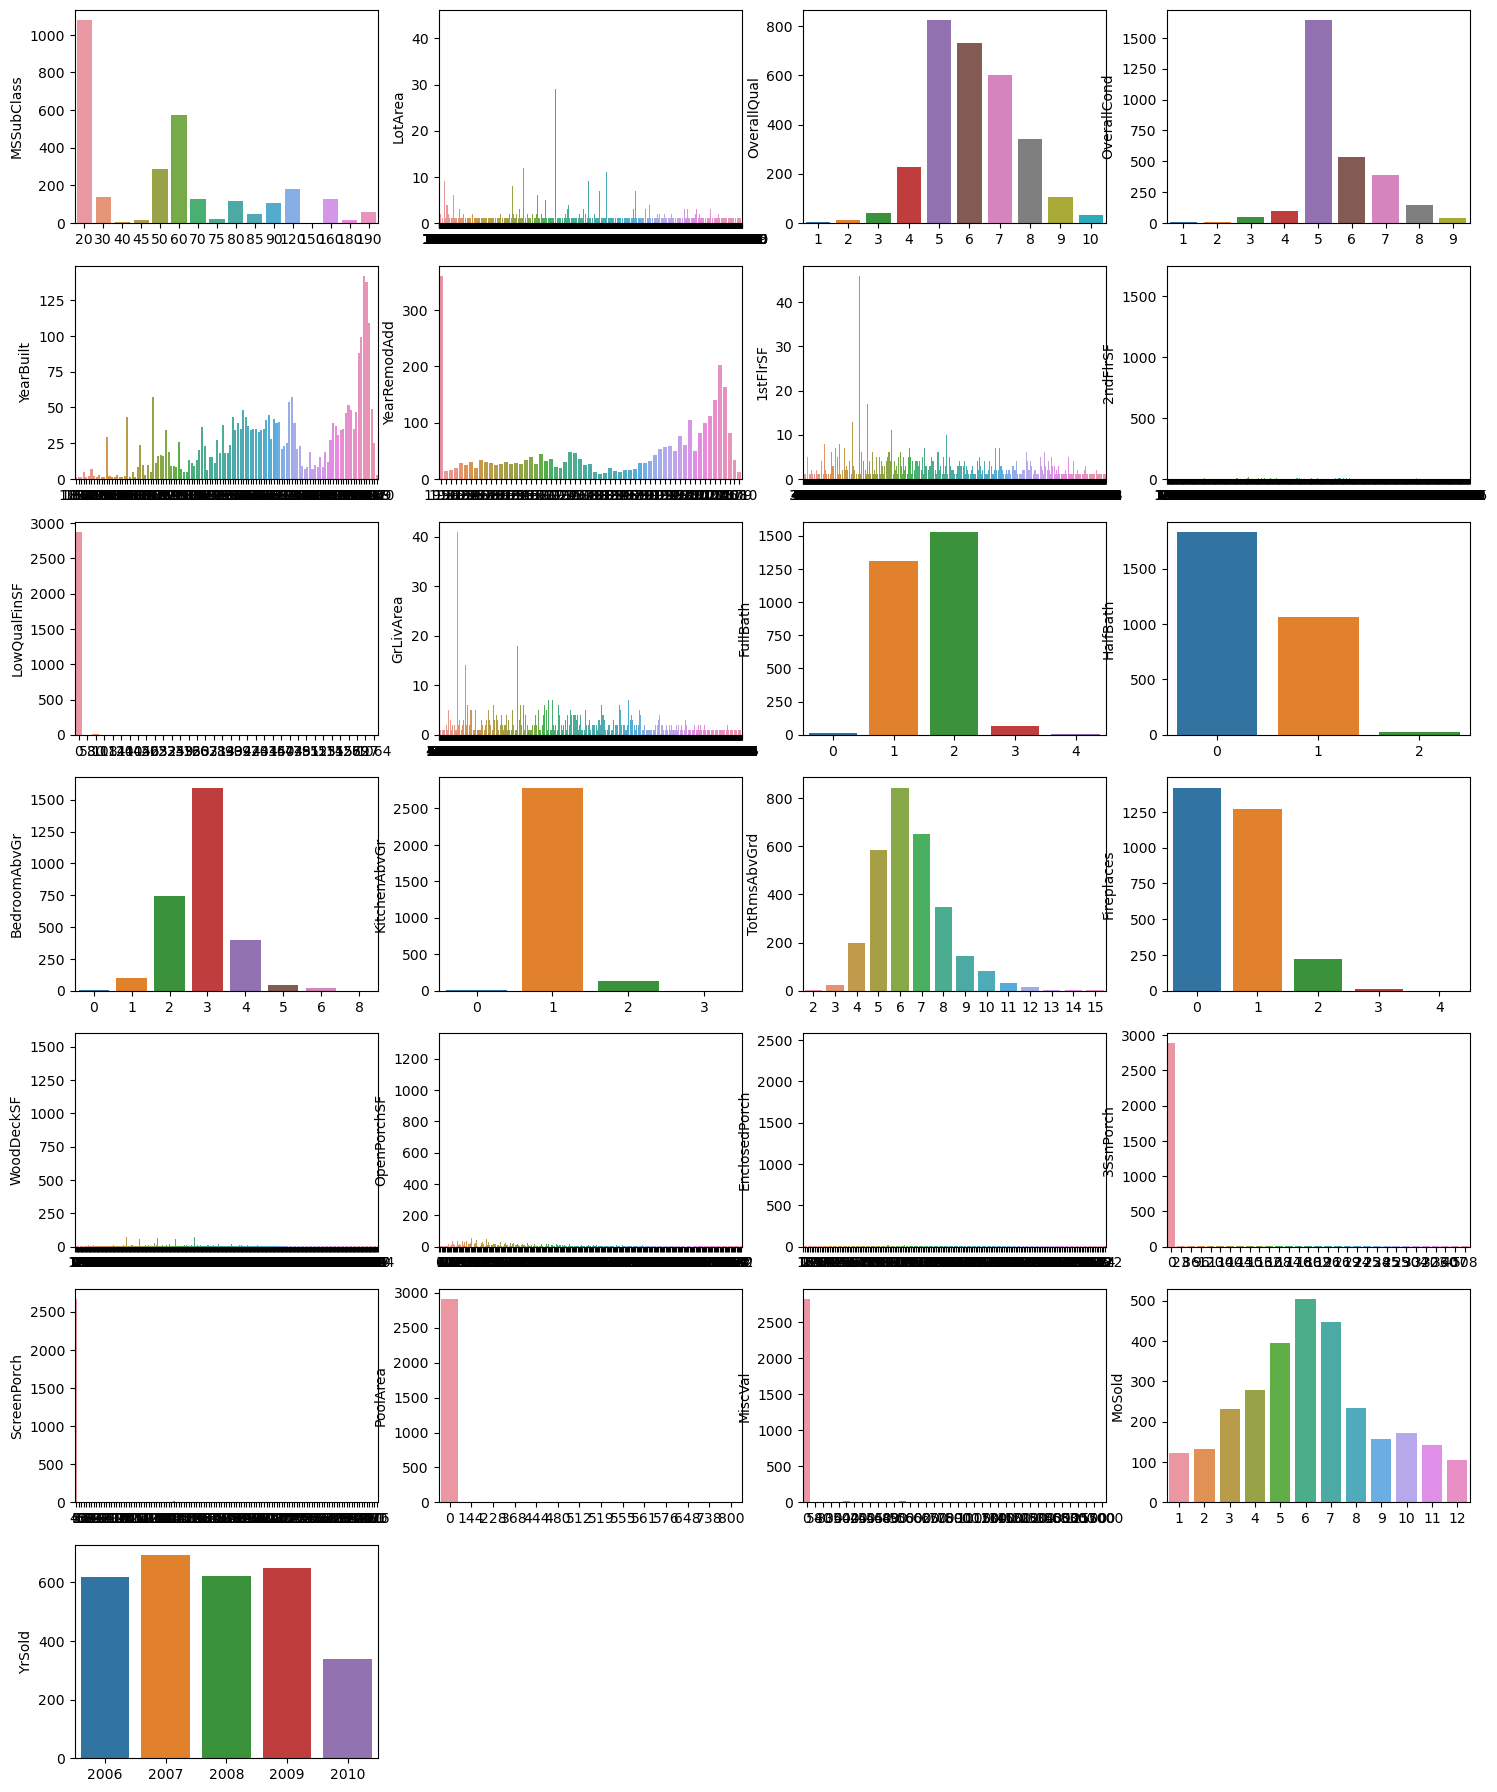

In [66]:
plt.figure(figsize=(18, 36))
plt.title('Integer Features: Distribution')
index = 1
 
for col in num_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    sns.barplot(x=list(y.index), y=y)
    index += 1

<Axes: title={'center': 'No. Unique values of Float Features'}>

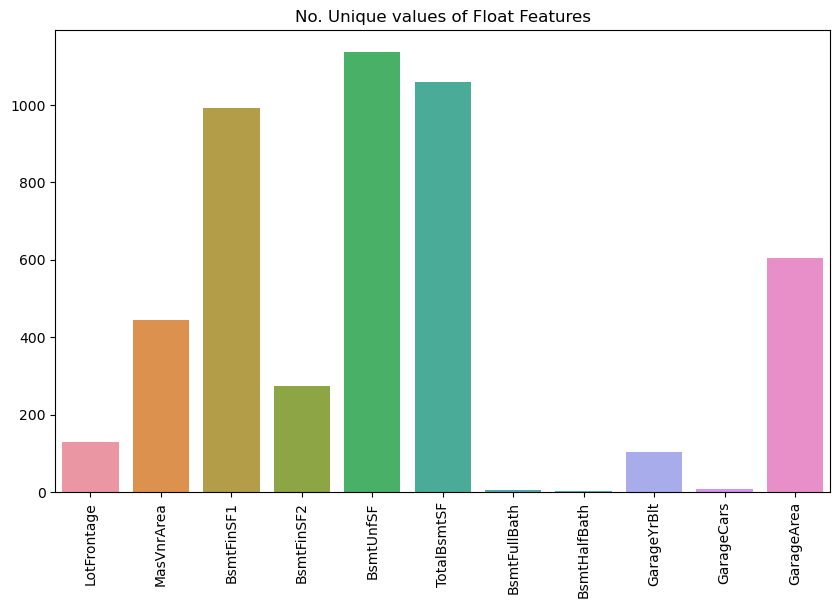

In [67]:
unique_values = []
for col in fl_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Float Features')
plt.xticks(rotation=90)
sns.barplot(x=fl_cols,y=unique_values)

/tmp/ipykernel_31/629436277.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


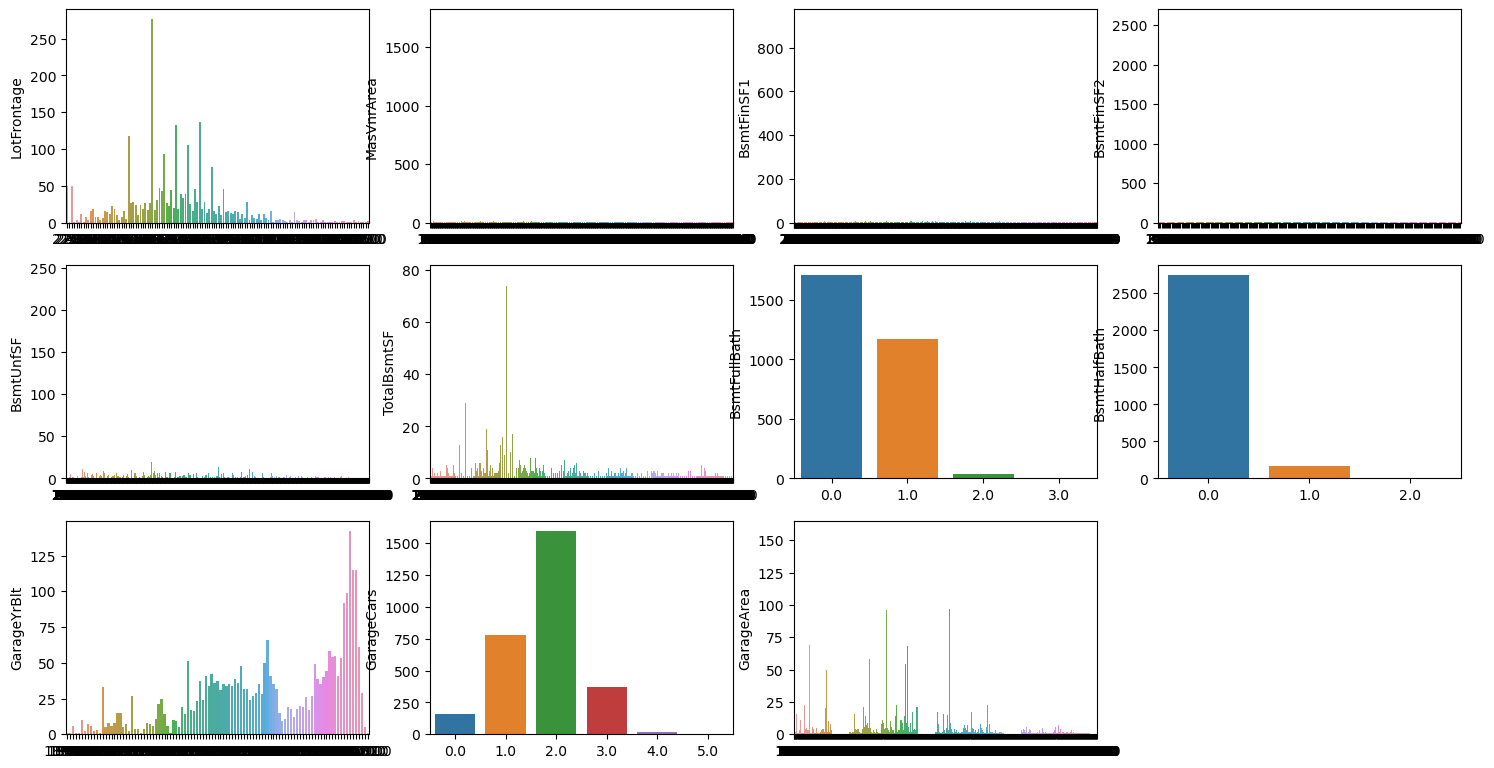

In [68]:
plt.figure(figsize=(18, 36))
plt.title('Float Features: Distribution')
index = 1
 
for col in fl_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    sns.barplot(x=list(y.index), y=y)
    index += 1

Все нулевые значения в колонке FireplaceQu выражают ноль количества каминов. Описание данных говорит, что NA означает "нет камина".

Столбец LotFrontage - площадь каждой улицы, связанной с домом, скорее всего, имеет схожую площадь с другими домами в его районе, мы можем заполнить недостающие значения медианным LotFrontage района.

In [21]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("Nofireplaces")
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Object - mode, float64 - mean

In [22]:
for col in object_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    index += 1

In [23]:
for col in fl_cols:
    df[col] = df[col].fillna(df[col].mean())
    index += 1

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [24]:
for col in df.select_dtypes("O").columns:
    print("\n" + 5* "-" + col .center(20) + 5 * "-"+"\n")
    print(f"* the number unique values equal {df[col].nunique()} \n")
    print(df[col].value_counts())


-----      MSZoning      -----

* the number unique values equal 5 

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

-----       Street       -----

* the number unique values equal 2 

Pave    2907
Grvl      12
Name: Street, dtype: int64

-----      LotShape      -----

* the number unique values equal 4 

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

-----    LandContour     -----

* the number unique values equal 4 

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

-----     Utilities      -----

* the number unique values equal 2 

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

-----     LotConfig      -----

* the number unique values equal 5 

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

-----     LandSlope      -----

* the number unique values equal 3 

Gtl    2778
Mod     1

Столбец Street. 2905 записей имеют статус Pave, но только 12 записей имеют статус Grvl.
Столбец Utilities. Все записи - AllPub, за исключением одной NoSeWa.
Эта функция не поможет в предиктивном моделировании. Удаляем.

In [25]:
df.drop(columns=['Street','Utilities','MSSubClass','PoolArea'], inplace=True)

In [26]:
#House age when it was sold
df['HouseAge'] = df['YrSold']-df['YearBuilt']
#age of renovated house when it was sold
df['AgeRemod'] = df['YrSold']-df['YearRemodAdd']
#age of garage when it was sold
df['AgeGrgSold'] = df['YrSold']-df['GarageYrBlt']

In [27]:
basement_cols=[f for f in df.columns if "Bsmt" in f]
df[basement_cols].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1.0,0.0
1,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,0.0,1.0
2,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1.0,0.0
3,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1.0,0.0
4,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1.0,0.0


In [28]:
# Total Basement Area
df["TotalBsmtSF"] = df['BsmtFinSF1']+df['BsmtFinSF2']+df['BsmtUnfSF']

In [29]:
#Adding Total Square Feet feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [30]:
# drop leaky columns
df.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF' ,'YrSold',
                     'YearBuilt','GarageYrBlt','YearRemodAdd' ,
                     'TotalBsmtSF' ,'1stFlrSF','2ndFlrSF'], inplace=True)

In [31]:
df.shape

(2919, 65)

In [32]:
#  explore porch columns

porch_cols=[f for f in df.columns if "Porch" in f]
df[porch_cols].describe([0.8,0.84,0.9])

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,2919.000000,2919.000000,2919.000000,2919.000000
mean,47.486811,23.098321,2.602261,16.062350
std,67.575493,64.244246,25.188169,56.184365
min,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000
80%,85.000000,0.000000,0.000000,0.000000
84%,101.000000,0.000000,0.000000,0.000000
90%,131.200000,112.000000,0.000000,0.000000
max,742.000000,1012.000000,508.000000,576.000000


84% от 3SsnPorch, EnclosedPorch и ScreenPorch равны нулю. Это приведет к перекосу данных, что снизит эффективность нашей модели. Поэтому мы их отбросим.

In [33]:
df.drop(columns=['3SsnPorch', 'EnclosedPorch' ,'ScreenPorch'] , inplace=True)

In [34]:
df["WoodDeckSF"].describe([0.85,0.9,0.95])

count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
50%         0.000000
85%       214.000000
90%       257.000000
95%       328.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64

Столбцы LowQualFinSF и MiscVal. Более 95% значений равны нулю. Мы отбросим его.

In [35]:
df.drop(columns=['LowQualFinSF',"MiscVal"] , inplace=True)

In [36]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 37
Integer variables: 15
Float variables: 8


Разделение признаков на категориальные и числовые
descrete_cols содержит имена столбцов в датафрейме df, которые имеют меньше 10 уникальных значений и не являются объектами (строками).
num_cols содержит имена столбцов в датафрейме df, которые не являются объектами (строками).
num_cols перезаписывается так, чтобы исключить столбцы из descrete_cols.

In [37]:
descrete_cols = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != 'O']

# numerical columns
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
num_cols = [col for col in num_cols if col not in descrete_cols]

print(f'количество числовых столбцов: {len(num_cols)}')
print(f'num_cols: {num_cols}')
print('------------------------')
print(f'количество дискретных столбцов: {len(descrete_cols)}')
print(f'descrete columns: {descrete_cols}')

количество числовых столбцов: 14
num_cols: ['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'HouseAge', 'AgeRemod', 'AgeGrgSold', 'TotalSF']
------------------------
количество дискретных столбцов: 9
descrete columns: ['OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars']


In [38]:
for col in num_cols:
    print(f"{col}   {df[col].nunique()}") 

LotFrontage   130
LotArea   1951
OverallQual   10
MasVnrArea   445
GrLivArea   1292
TotRmsAbvGrd   14
GarageArea   604
WoodDeckSF   379
OpenPorchSF   252
MoSold   12
HouseAge   128
AgeRemod   63
AgeGrgSold   116
TotalSF   1499


In [39]:
def two_plots_num_column(feature):
    
    print(f"величина перекоса {feature} столбца = {df[feature].skew():.2f}")
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.title('histgram')
    sns.histplot(data=df, x=feature, kde=True)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    plt.subplot(1,2,2)
    plt.title('Boxplot')
    sns.boxplot(y=df[feature])

величина перекоса LotFrontage столбца = 1.51
величина перекоса LotArea столбца = 12.83
величина перекоса OverallQual столбца = 0.20
величина перекоса MasVnrArea столбца = 2.61
величина перекоса GrLivArea столбца = 1.27
величина перекоса TotRmsAbvGrd столбца = 0.76
величина перекоса GarageArea столбца = 0.24
величина перекоса WoodDeckSF столбца = 1.84
величина перекоса OpenPorchSF столбца = 2.54
величина перекоса MoSold столбца = 0.20
величина перекоса HouseAge столбца = 0.60
величина перекоса AgeRemod столбца = 0.45
величина перекоса AgeGrgSold столбца = 0.39
величина перекоса TotalSF столбца = 1.52


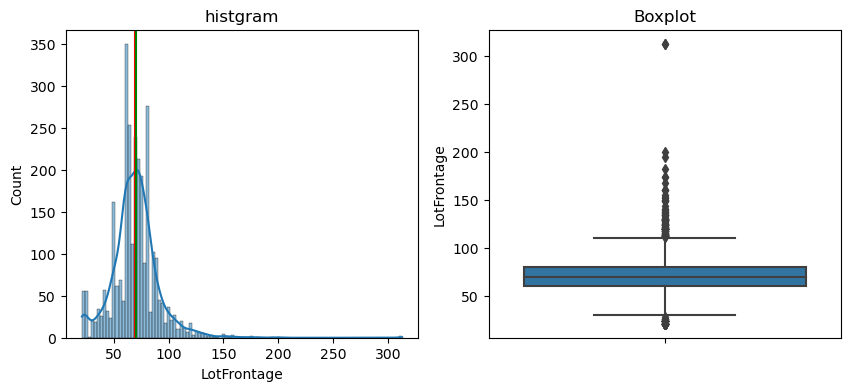

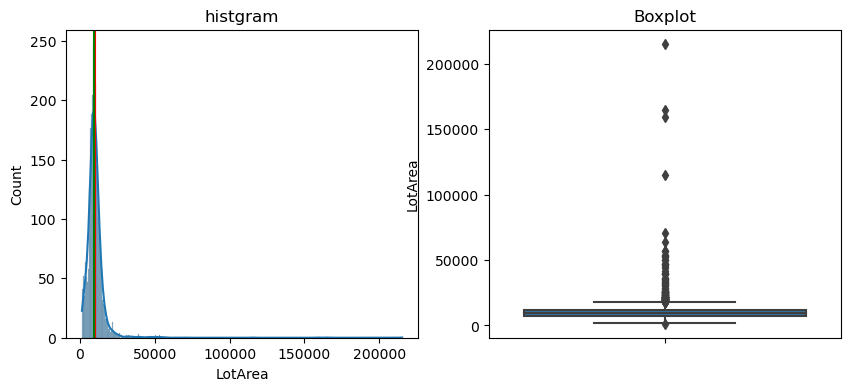

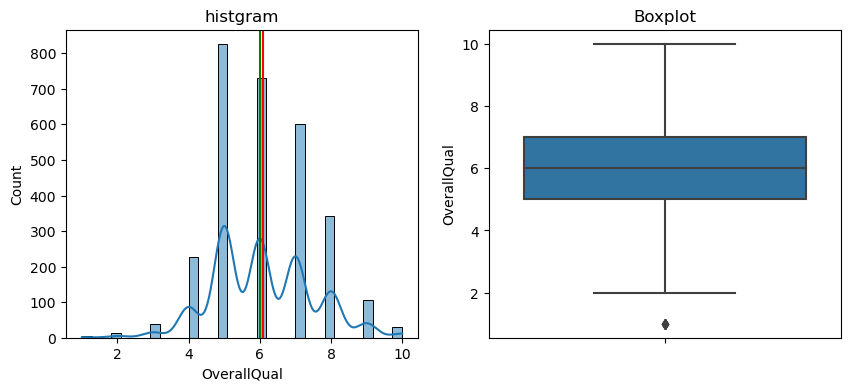

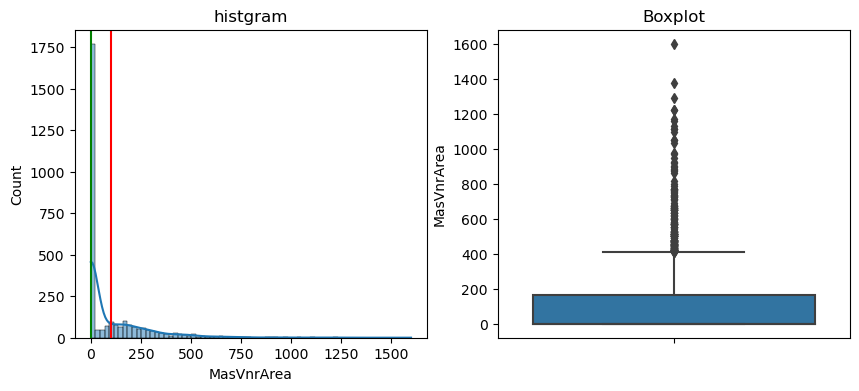

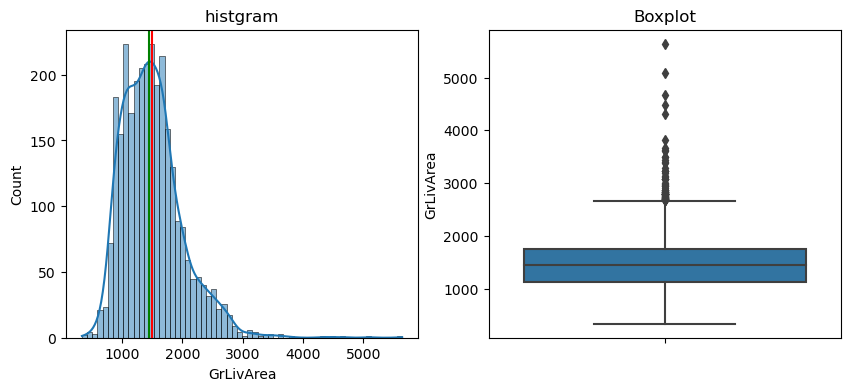

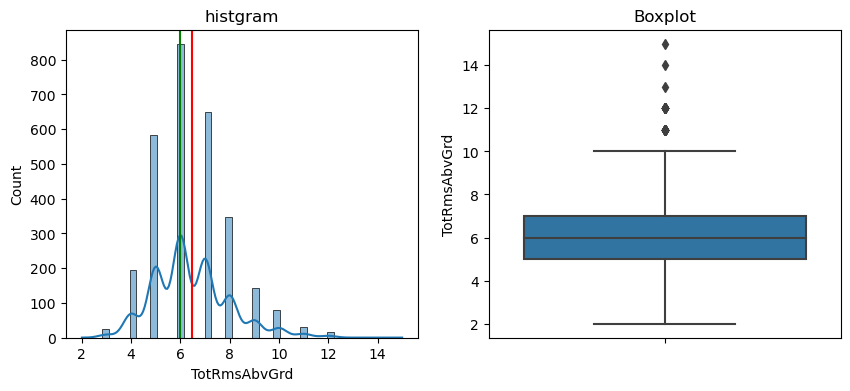

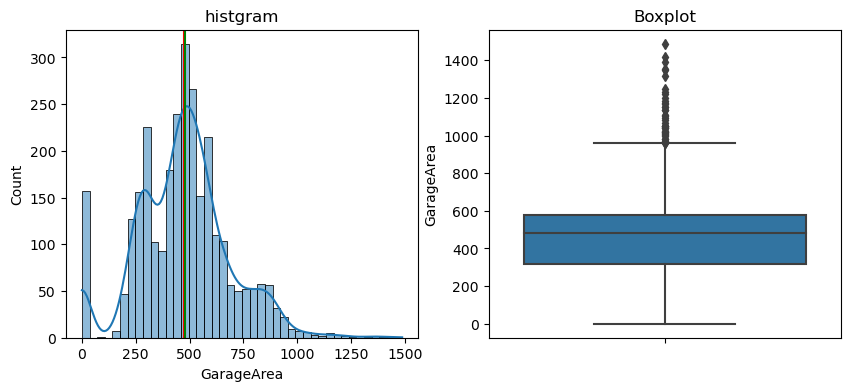

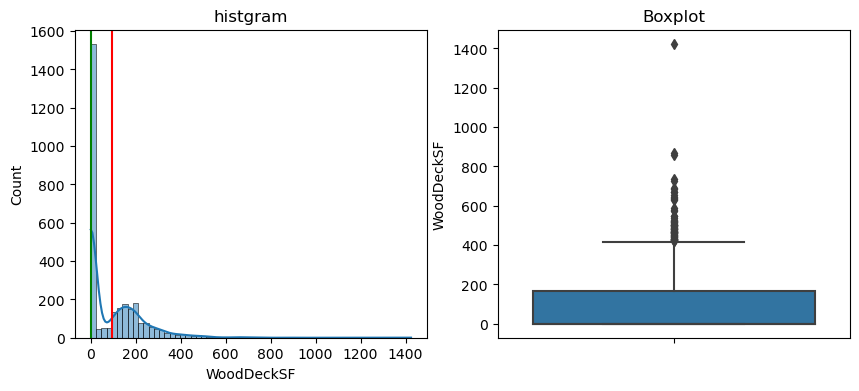

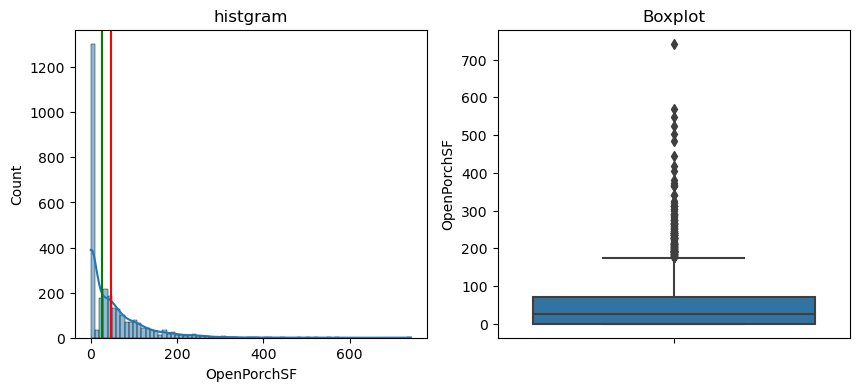

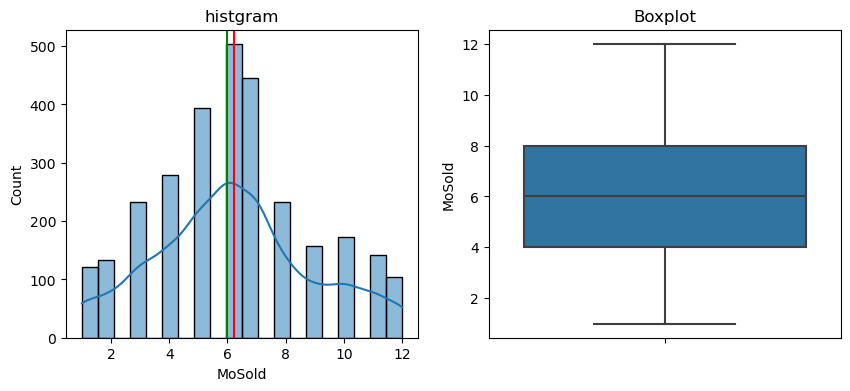

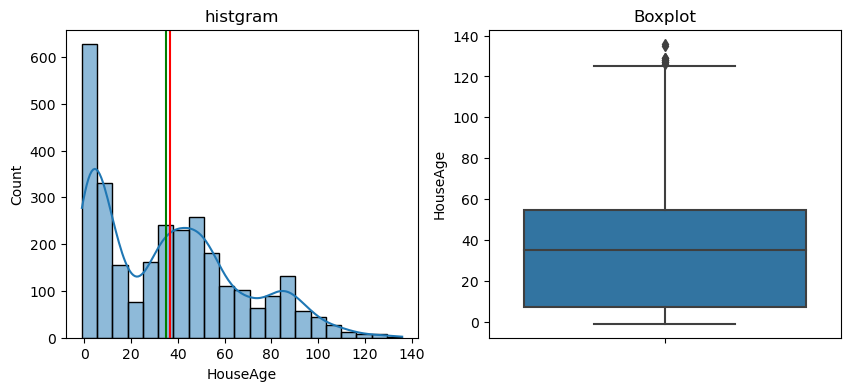

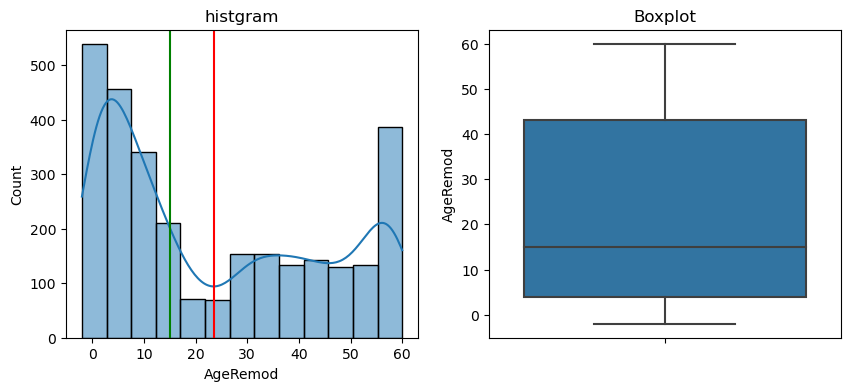

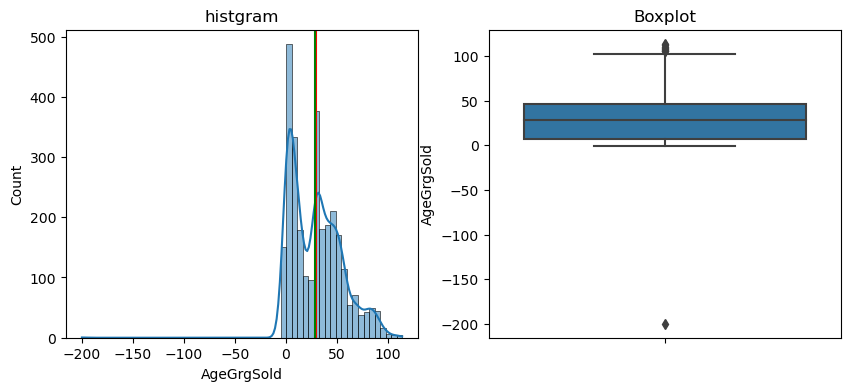

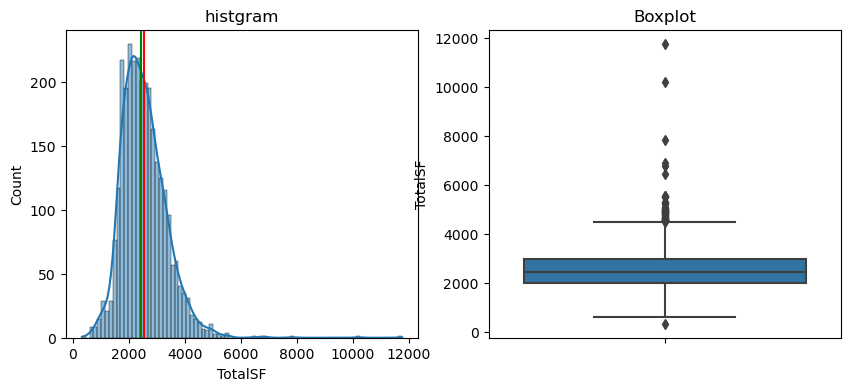

In [40]:
for col in num_cols:
    two_plots_num_column(col)

Работа с выбросами и перекосами

In [41]:
# Создадим булеву маску для определения значений, которые больше 150
mask = df['LotFrontage'] > 140

# Заменим значения, удовлетворяющие маске, средним значением
df.loc[mask, 'LotFrontage'] = df['LotFrontage'].mean()

In [42]:
mask = df['GrLivArea'] > 3000
df.loc[mask, 'GrLivArea'] = df['GrLivArea'].mean()

In [43]:
mask = df['LotArea'] > 20000
df.loc[mask, 'LotArea'] = df['LotArea'].mean()

In [44]:
mask = df['MasVnrArea'] > 700
df.loc[mask, 'MasVnrArea'] = df['MasVnrArea'].mean()

In [45]:
mask = df['GrLivArea'] > 3000
df.loc[mask, 'GrLivArea'] = df['MasVnrArea'].mean()

In [46]:
mask = df['TotRmsAbvGrd'] > 10
df.loc[mask, 'TotRmsAbvGrd'] = df['TotRmsAbvGrd'].mean()

In [47]:
mask = df['GarageArea'] > 1200
df.loc[mask, 'GarageArea'] = df['GarageArea'].mean()

In [48]:
mask = df['WoodDeckSF'] > 400
df.loc[mask, 'WoodDeckSF'] = df['WoodDeckSF'].mean()

In [49]:
mask = df['OpenPorchSF'] > 300
df.loc[mask, 'OpenPorchSF'] = df['OpenPorchSF'].mean()

In [51]:
mask = df['TotalSF'] > 5500
df.loc[mask, 'TotalSF'] = df['TotalSF'].mean()

величина перекоса LotFrontage столбца = 0.13
величина перекоса LotArea столбца = 0.09
величина перекоса OverallQual столбца = 0.20
величина перекоса MasVnrArea столбца = 1.78
величина перекоса GrLivArea столбца = 0.65
величина перекоса TotRmsAbvGrd столбца = 0.37
величина перекоса GarageArea столбца = 0.08
величина перекоса WoodDeckSF столбца = 0.96
величина перекоса OpenPorchSF столбца = 1.64
величина перекоса MoSold столбца = 0.20
величина перекоса HouseAge столбца = 0.60
величина перекоса AgeRemod столбца = 0.45
величина перекоса AgeGrgSold столбца = 0.39
величина перекоса TotalSF столбца = 0.58


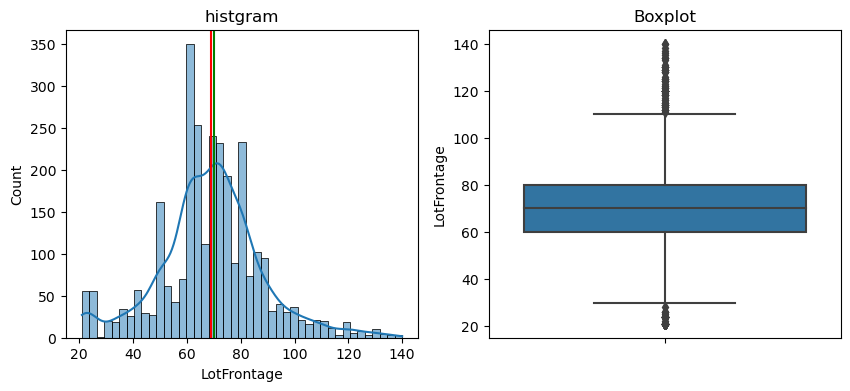

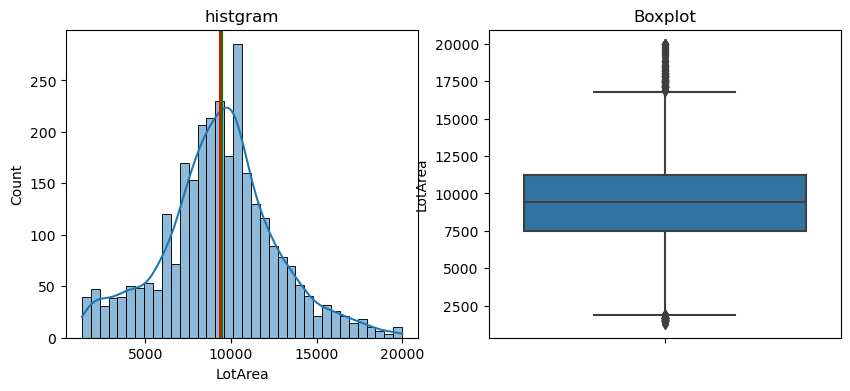

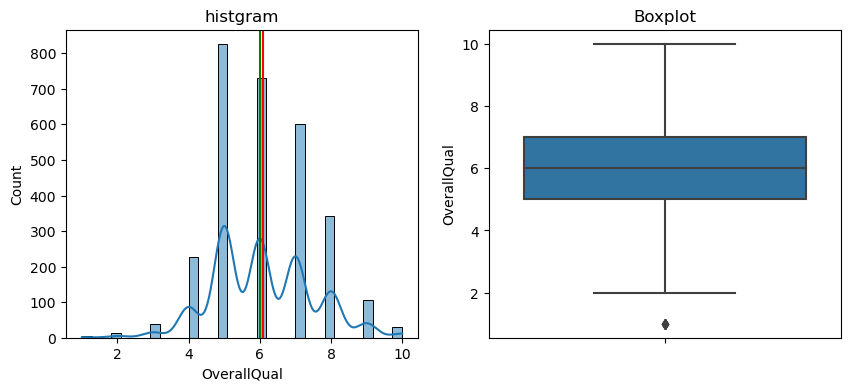

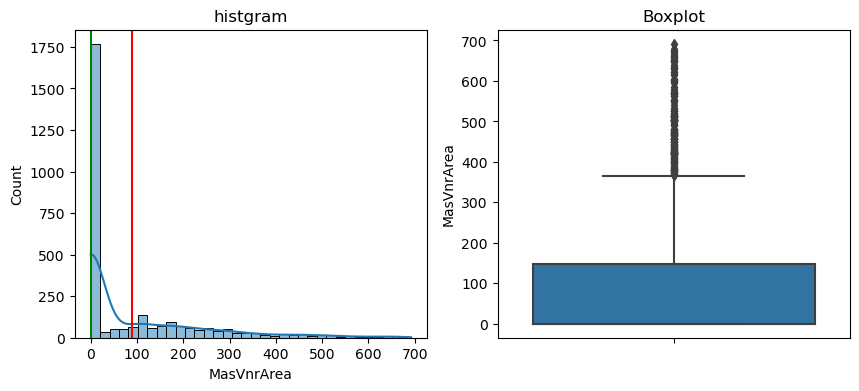

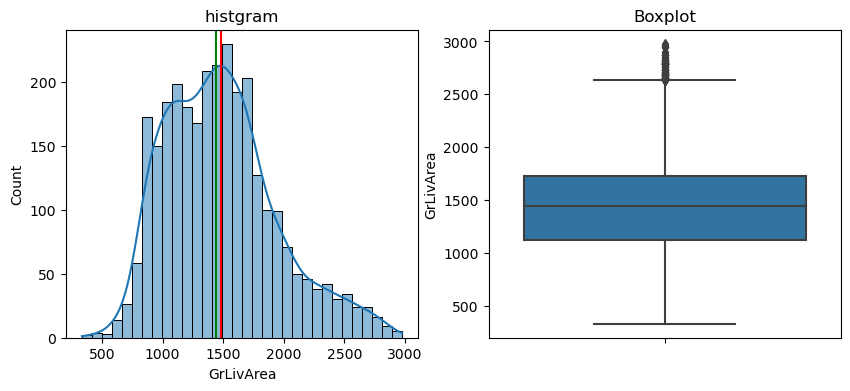

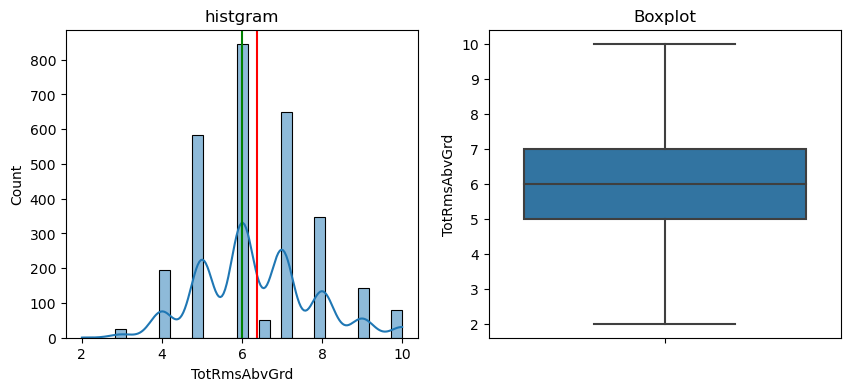

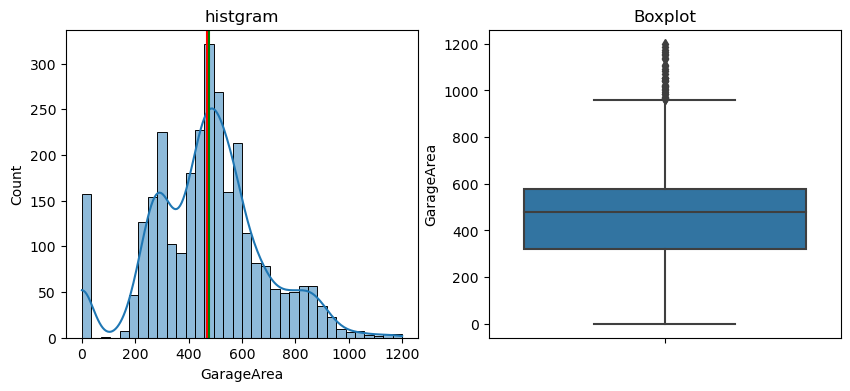

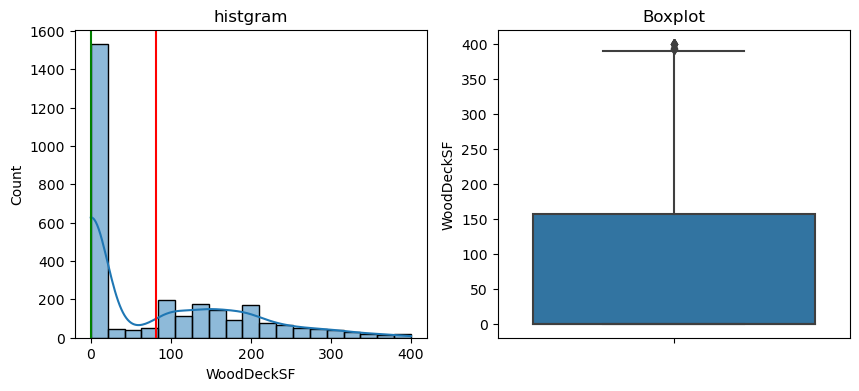

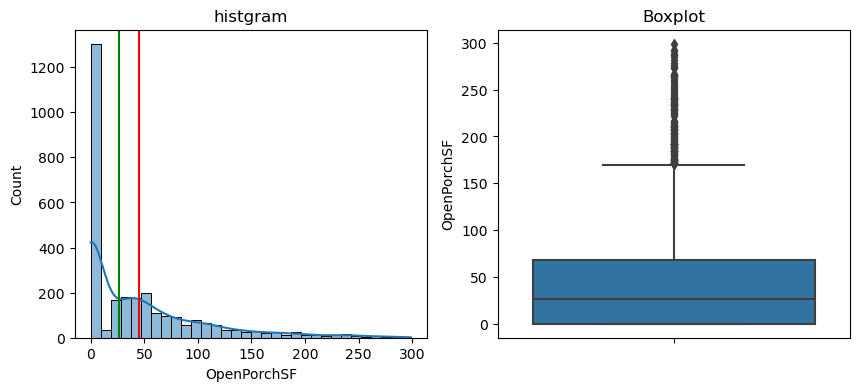

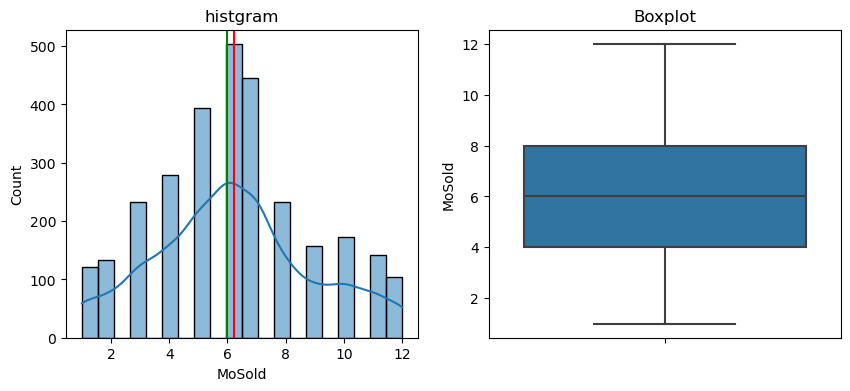

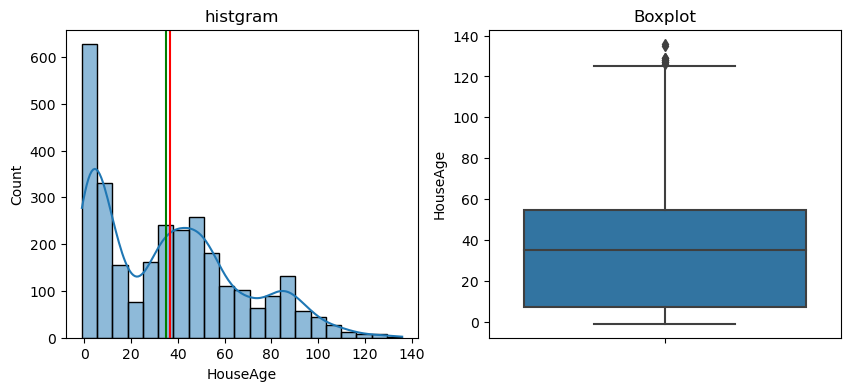

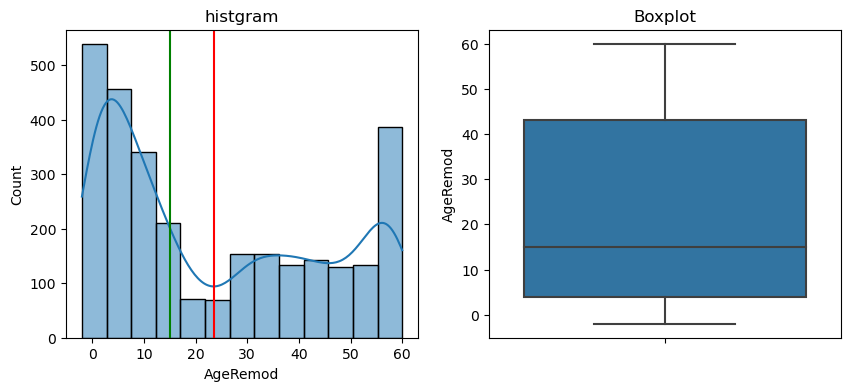

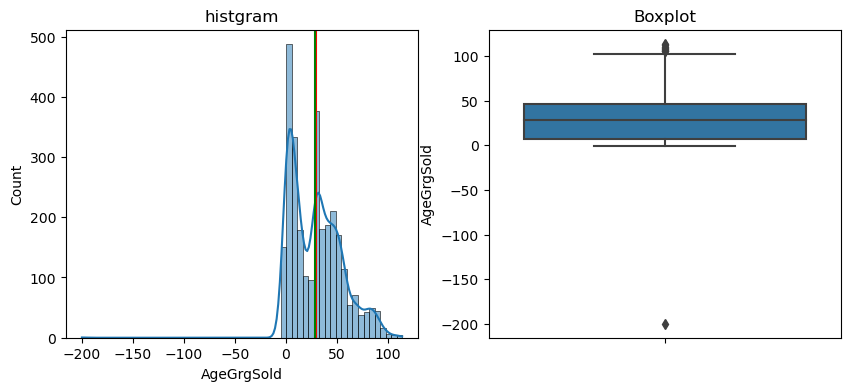

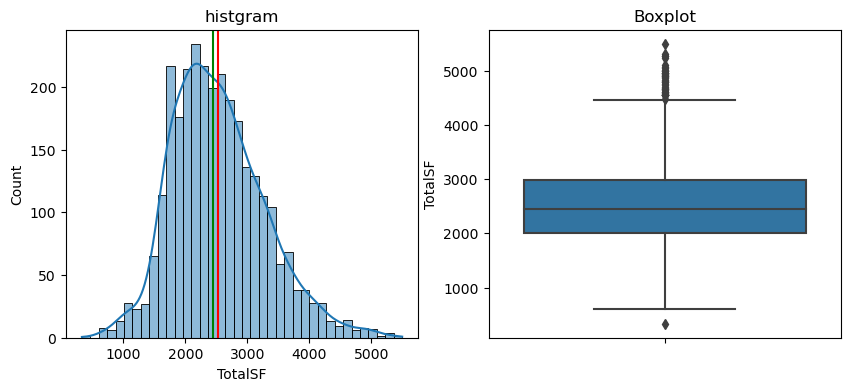

In [52]:
for col in num_cols:
    two_plots_num_column(col)

Исследуем дескретные данные

In [54]:
print(f'количество дескретных столбцов: {len(descrete_cols)}')
print(f'дескретных столбцов: {descrete_cols}')

количество дескретных столбцов: 9
дескретных столбцов: ['OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars']


In [55]:
def two_plots_descrete_column(feature):
    
    plt.figure(figsize=(12,6))
    
    plt.subplot(1,2,1)
    plt.title(f'{feature} Histogram')
    sns.countplot(data=train , x=feature ,palette="Set2")
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    plt.title(f'{feature} vs Price')
    sns.boxplot(x=train[feature], y=train["SalePrice"],palette="Set2")
    plt.xticks(rotation=90)
    
    plt.tight_layout()

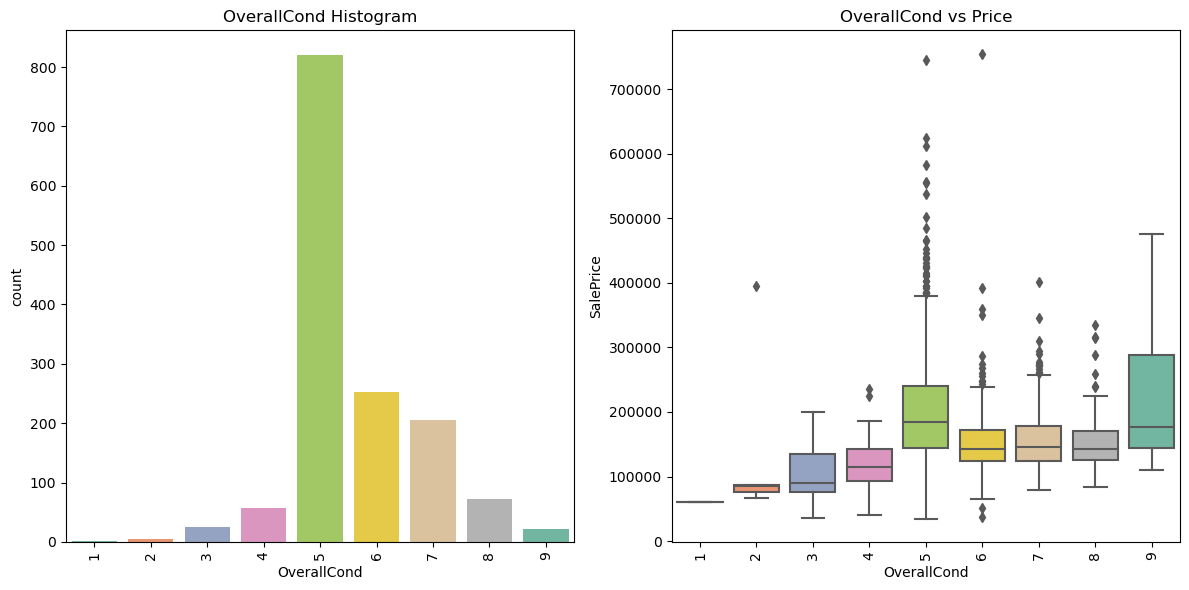

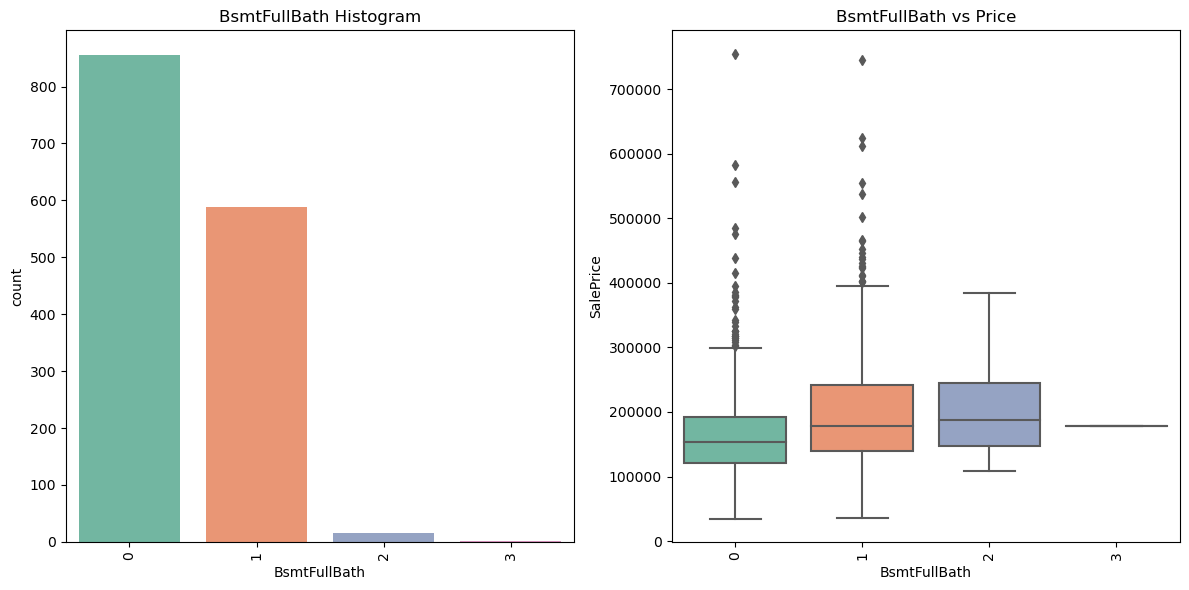

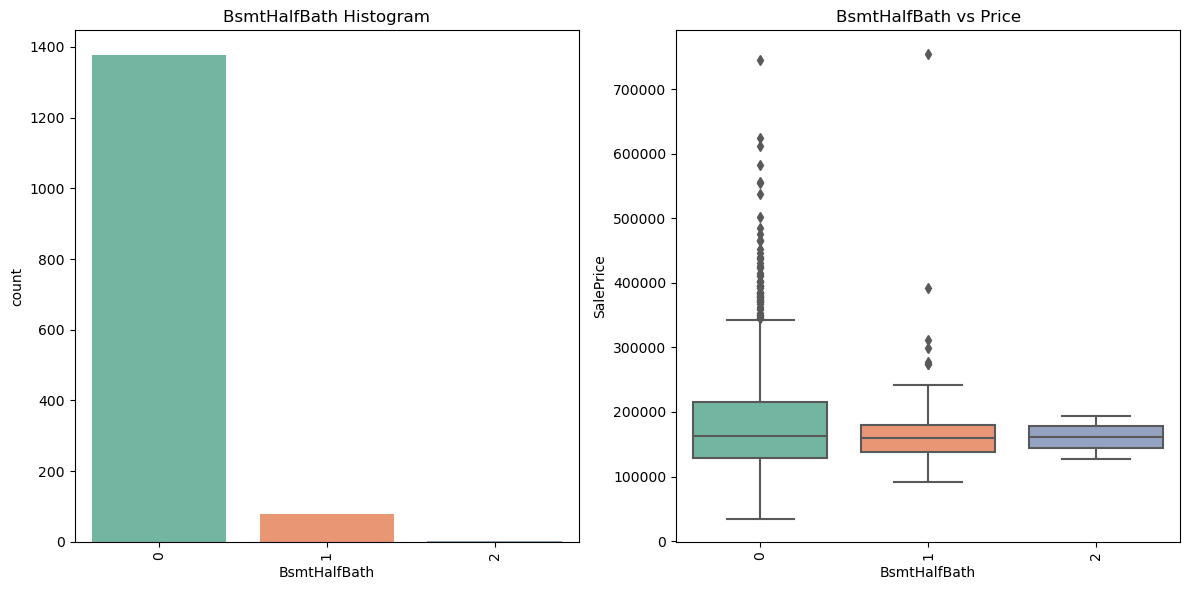

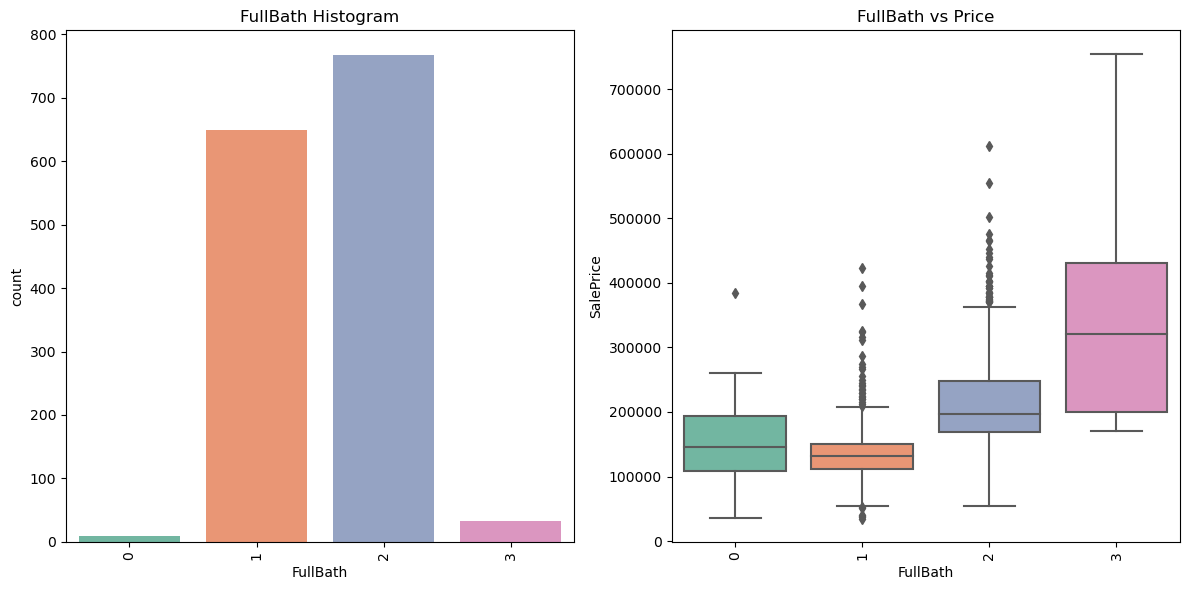

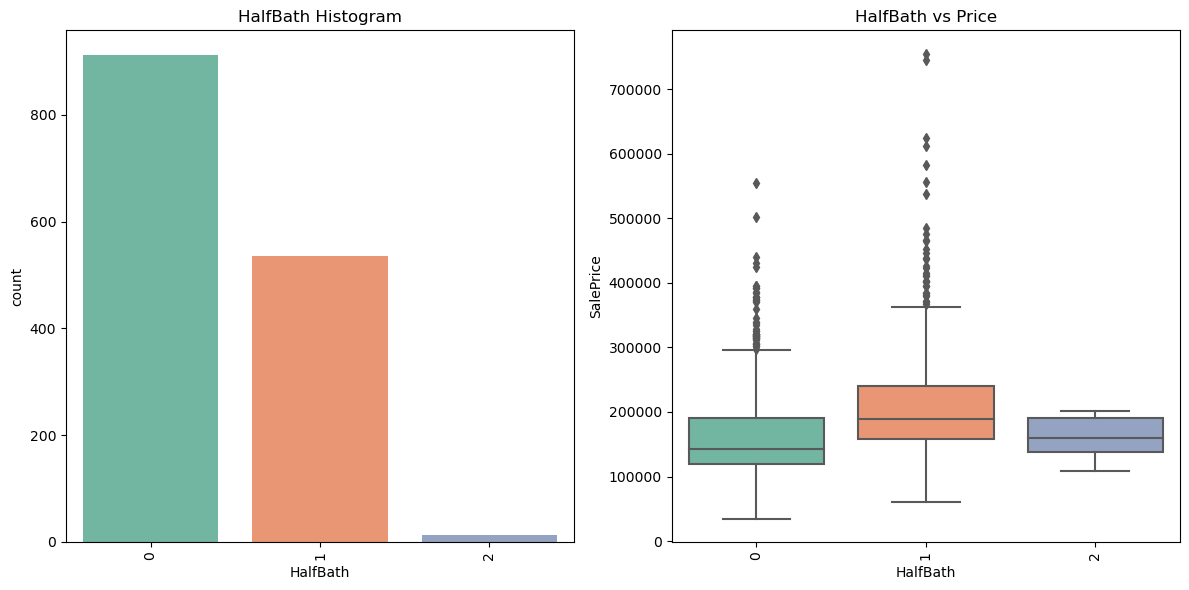

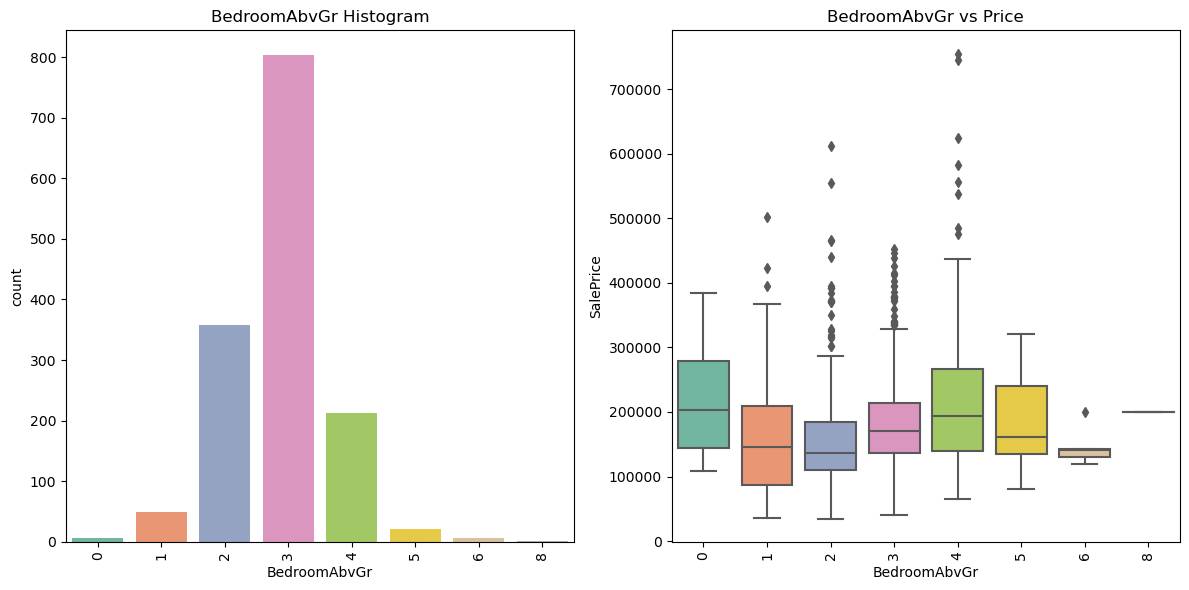

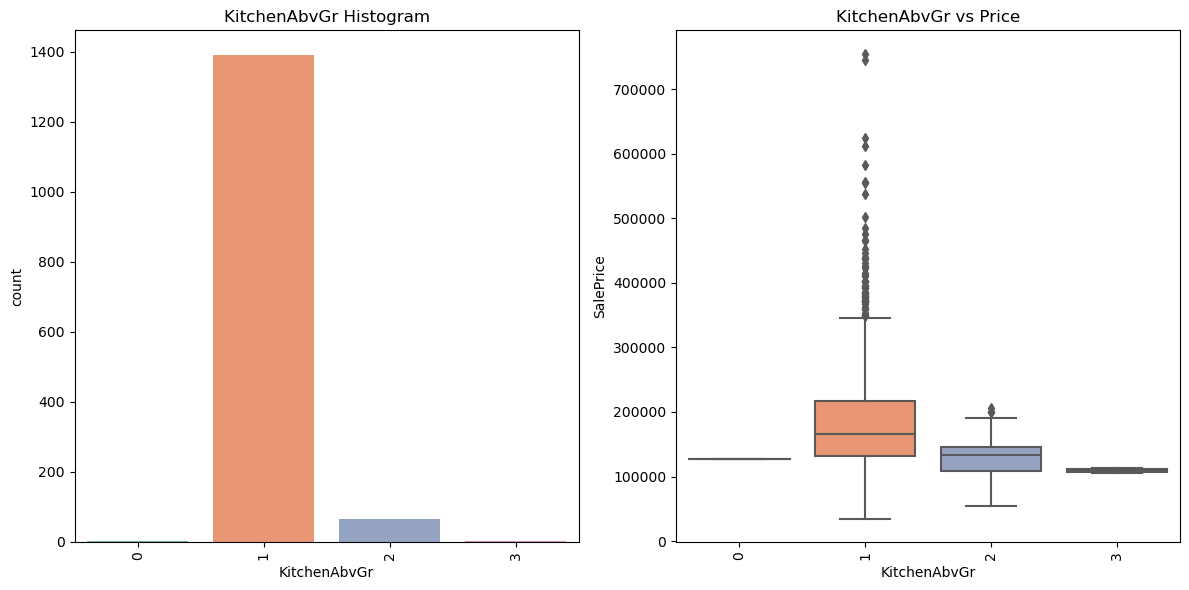

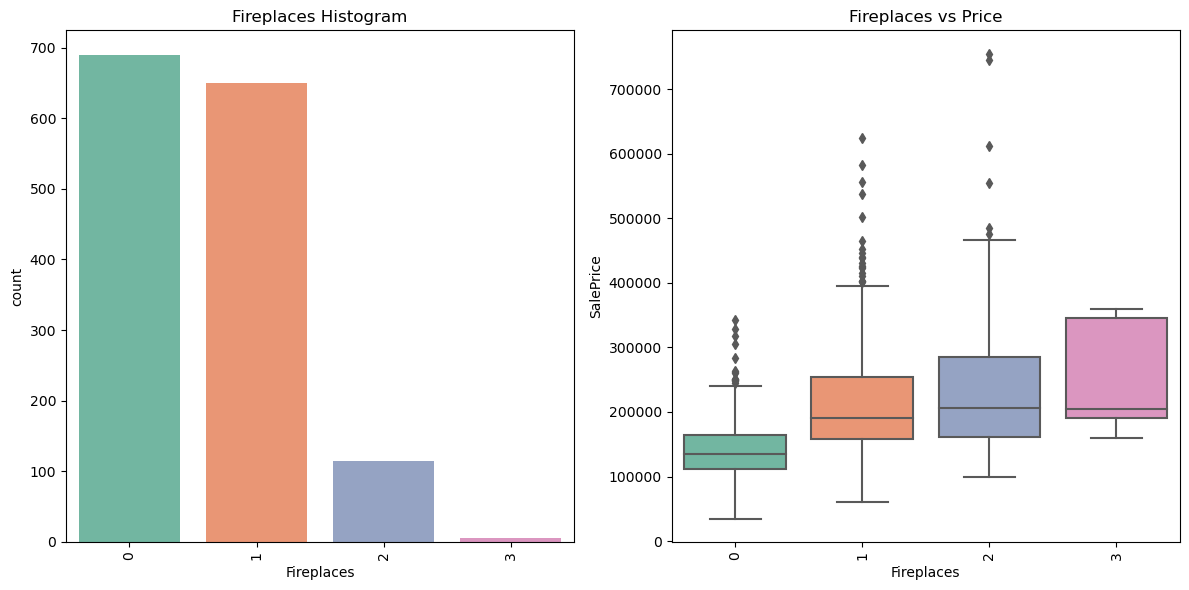

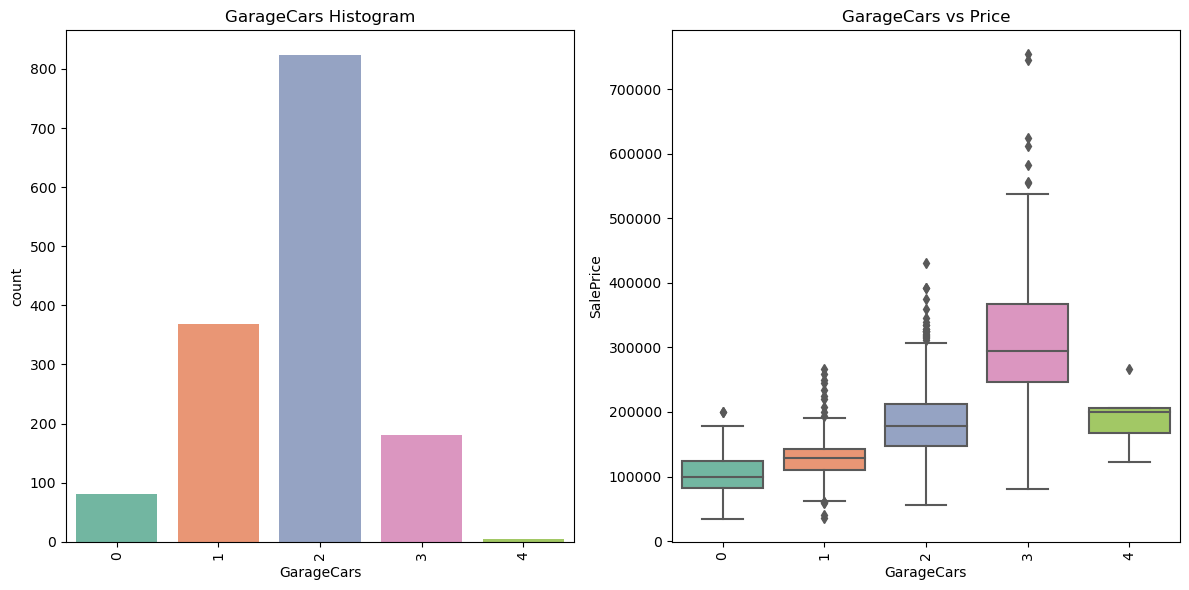

In [57]:
for col in descrete_cols:
    two_plots_descrete_column(col)

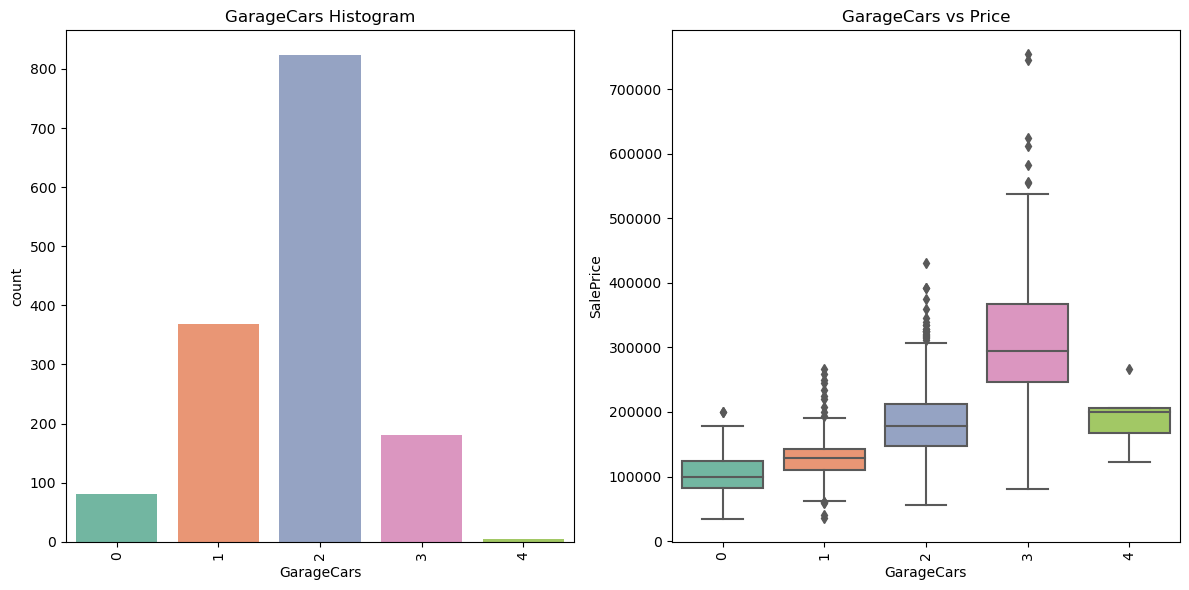

In [58]:
two_plots_descrete_column('GarageCars')

Исследуем категориальные данные

In [59]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == 'O']

# категориальные столбцы
cat_cols = [col for col in cat_cols if col not in cat_but_car]

В первом списке cat_cols содержатся названия столбцов в датафрейме df, которые имеют тип данных ‘O’, то есть объекты. Во втором списке cat_but_car содержатся названия столбцов в датафрейме df, которые имеют более 20 уникальных значений и тип данных ‘O’. Затем из первого списка cat_cols удаляются те элементы, которые есть во втором списке cat_but_car. Таким образом, в списке cat_cols остаются только те столбцы, которые имеют тип данных ‘O’ и менее 20 уникальных значений. 

In [60]:
df[cat_cols].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,...,Gd,Typ,Nofireplaces,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Feedr,Norm,1Fam,1Story,Gable,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Norm,Norm,1Fam,2Story,Gable,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,Norm,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [62]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# label encoder
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in ['int64', 'float64'] and df[col].nunique() <= 2]

for col in binary_cols:
    df = label_encoder(df, col)

Функция label_encoder принимает на вход датафрейм и название бинарного столбца. Функция использует класс LabelEncoder из библиотеки sklearn.preprocessing, чтобы преобразовать бинарные значения столбца в числа 0 и 1. Функция возвращает измененный датафрейм. Затем создается список binary_cols, который содержит названия столбцов в датафрейме df, которые имеют тип данных, отличный от ‘int64’ и ‘float64’, и не более двух уникальных значений. Далее для каждого столбца из списка binary_cols вызывается функция label_encoder, чтобы преобразовать его значения в числа 0 и 1. Таким образом, датафрейм df модифицируется с помощью функции label_encoder.

In [63]:
# one hot encoder
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
ohe_cols = [col for col in df.columns if 25 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)

Здесь определена функция one_hot_encoder, которая принимает на вход датафрейм, список категориальных столбцов и параметр drop_first. Функция использует функцию pd.get_dummies из библиотеки pandas, чтобы преобразовать категориальные значения столбцов в набор фиктивных (dummy) столбцов с бинарными значениями 0 и 1. Параметр drop_first указывает, нужно ли удалять первый фиктивный столбец для каждой категории, чтобы избежать ловушки фиктивных переменных (dummy variable trap). Функция возвращает измененный датафрейм. Затем создается список ohe_cols, который содержит названия столбцов в датафрейме df, которые имеют от 2 до 25 уникальных значений. Далее вызывается функция one_hot_encoder с датафреймом df и списком ohe_cols, чтобы преобразовать их значения в фиктивные столбцы. Таким образом, датафрейм df модифицируется с помощью функции one_hot_encoder.

In [64]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

df.drop(useless_cols, axis=1, inplace=True)

print(useless_cols)

['MSZoning_RH', 'LotShape_IR3', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'OverallQual_2', 'OverallCond_2', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'ExterCond_Po', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Po', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Po', 'Ele

Здесь создается список useless_cols, который содержит названия столбцов в датафрейме df, которые имеют два уникальных значения и одно из них встречается реже, чем в 1% случаев. Это полезно для удаления столбцов, которые не несут полезной информации для анализа. Затем вызывается метод df.drop с параметрами useless_cols и axis=1, чтобы удалить эти столбцы из датафрейма df. Параметр inplace=True указывает, что изменения должны быть сохранены в самом датафрейме df. Затем выводится на экран список useless_cols, чтобы показать, какие столбцы были удалены.

In [65]:
df.shape

(2919, 197)

/tmp/ipykernel_32/1336783223.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


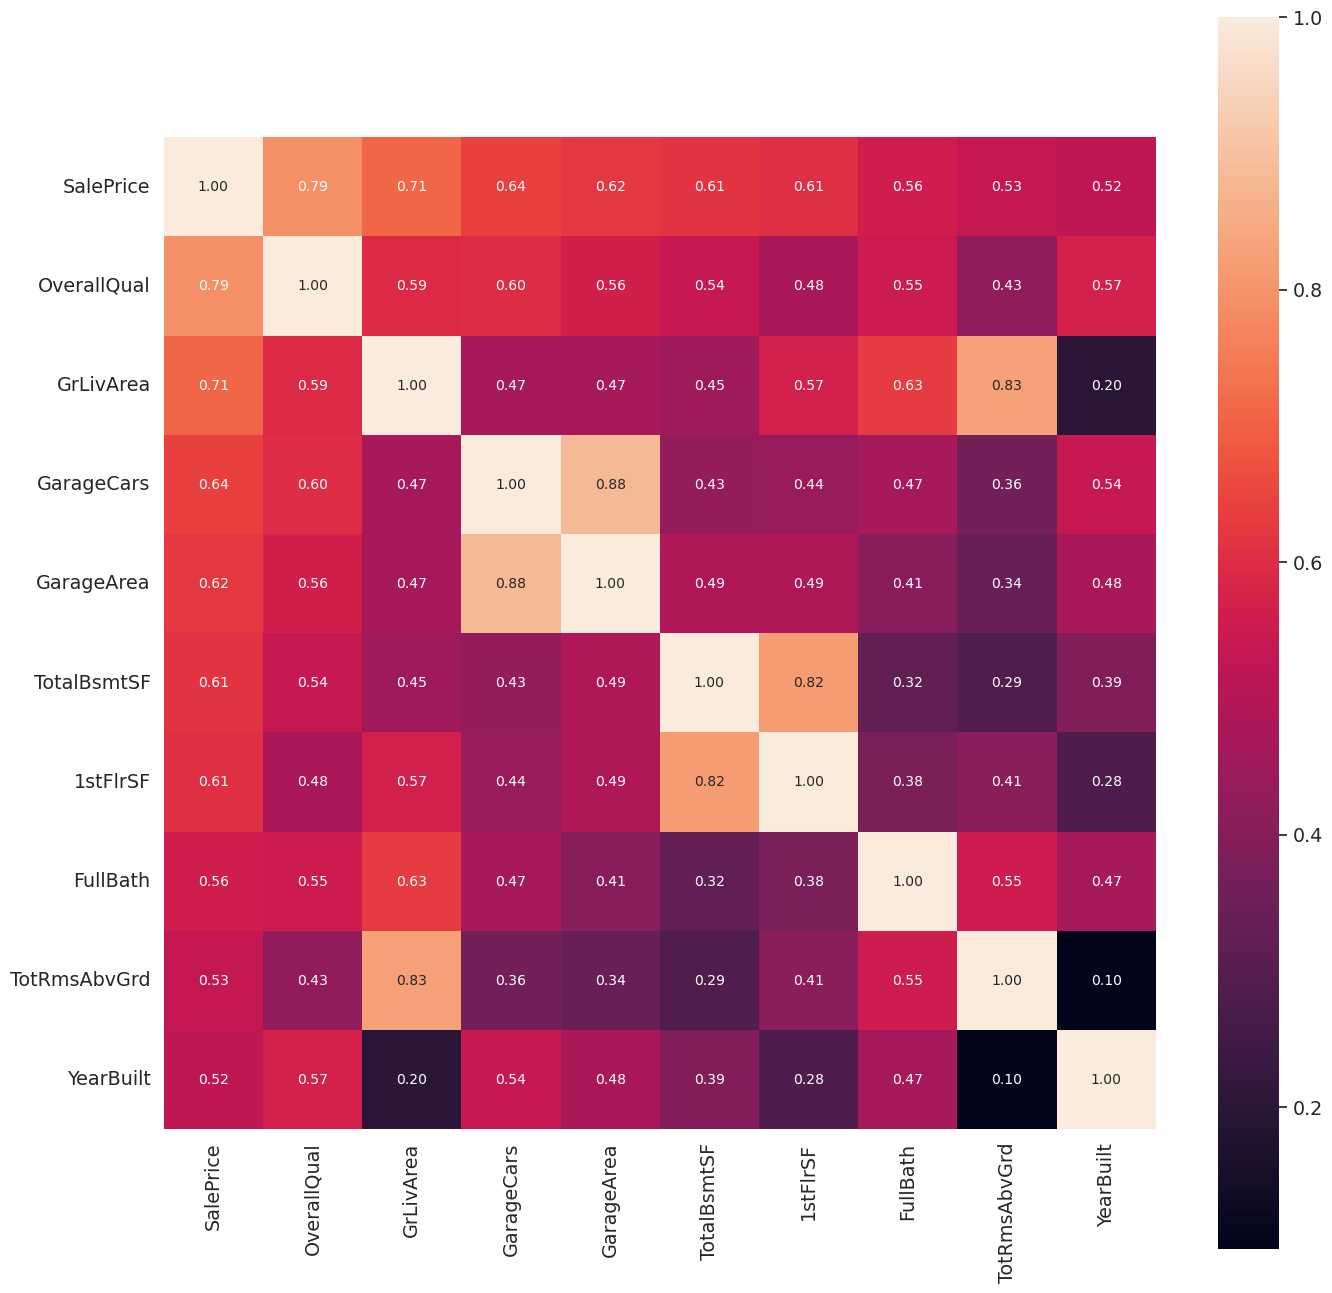

In [66]:
plt.figure(figsize=(16,16))
corrmat = train.corr()
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(train[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

МОДЕЛИРОВАНИЕ

In [67]:
train_processed = df[:ntrain]
test_processed = df[ntrain:]
print("Train_processed",train_processed.shape)
print("Test_processed",test_processed.shape)

Train_processed (1460, 197)
Test_processed (1459, 197)


In [68]:
X = train_processed
y = train["SalePrice"]

In [70]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1095, 197)
y_train (1095,)
X_test (365, 197)
y_test (365,)


In [71]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [72]:
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 30961.8007 (LR) 
RMSE: 47099.1692 (KNN) 
RMSE: 44990.7319 (CART) 
RMSE: 29724.0643 (RF) 
RMSE: 28996.9601 (GBM) 
RMSE: 29887.9924 (XGBoost) 
RMSE: 29812.9398 (LightGBM) 
RMSE: 25876.345 (CatBoost) 


Лучшим методом оказался CatBoost, так как он имеет наименьшее значение RMSE - 25876.345. CatBoost - это алгоритм градиентного бустинга на деревьях решений, который хорошо работает с категориальными признаками и устойчив к переобучению.

In [75]:
#Создаем модель catboost с параметром random_state=42 и параметром silent=True, 
#чтобы отключить вывод информации о процессе обучения
catboost_model = CatBoostRegressor(random_state=42, silent=True)

#Вычисляем значение RMSE на кросс-валидации с пятью фолдами
rmse = np.mean(np.sqrt(-cross_val_score(catboost_model, X, y, cv=5, scoring='neg_mean_squared_error')))

#Создаем словарь с набором значений для трех гиперпараметров модели catboost: 
#learning_rate, n_estimators и rsm
catboost_params = {'learning_rate': [0.01, 0.1], 'n_estimators': [500, 1500], 'rsm': [0.5, 0.7, 1]}

#Выполняем решетчатый поиск по гиперпараметрам модели catboost на кросс-валидации 
#с тремя фолдами и сохраняем лучшую модель в переменной catboost_best
catboost_best = GridSearchCV(catboost_model, catboost_params, cv=3, n_jobs=-1, verbose=True).fit(X, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [76]:
#Создаем финальную модель catboost с лучшими гиперпараметрами, найденными решетчатым поиском
final_model = catboost_best.best_estimator_

#Обучаем финальную модель на всем наборе данных X и y
final_model.fit(X, y)

#Вычисляем значение RMSE на кросс-валидации с пятью фолдами для финальной модели
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring='neg_mean_squared_error')))

In [77]:
rmse

26286.694690585886

In [84]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error ,r2_score

preds_cb = final_model.predict(X_test)
mae_cb = mean_absolute_error(y_test, preds_cb)
rmse_cb = np.sqrt(mean_squared_error(y_test, preds_cb))
cv_cb = np.mean(np.sqrt(-cross_val_score(final_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))

print(mae_cb)
print(rmse_cb)
print(cv_cb)

682.5456152687058
928.3885383361093
26713.58261113261


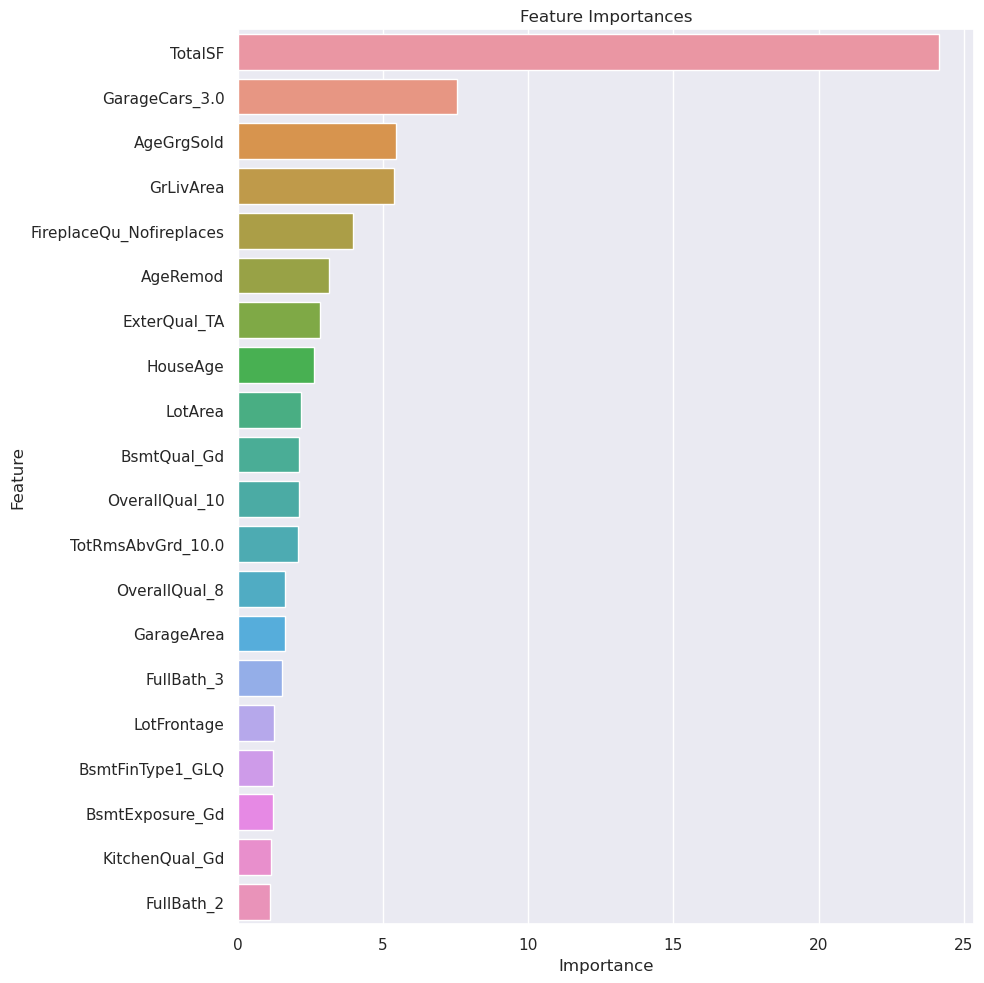

In [89]:
# Определяем функцию plot_importance, которая принимает на вход модель,
#датафрейм с признаками, параметр num, который указывает,
#сколько самых важных признаков нужно показать на графике (по умолчанию равен длине матрицы X),
#и параметр save, который указывает, нужно ли сохранить график в файл (по умолчанию равен False)

def plot_importance(model, features, num=len(X), save=False):

# Создаем датафрейм feature_imp, который содержит значения важности признаков
#из атрибута model.feature_importances_ и названия признаков из столбцов датафрейма features
  
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})

# Строим вертикальную столбчатую диаграмму с помощью библиотек matplotlib.pyplot и seaborn,
#которая показывает значения важности признаков по убыванию
  
    plt.figure(figsize=(10, 10)) # задаем размер графика
    sns.set(font_scale=1) # задаем размер шрифта
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num]) # строим столбчатую диаграмму с помощью функции sns.barplot
    plt.xlabel("Importance") # подписываем ось x
    plt.ylabel("Feature") # подписываем ось y
    plt.title("Feature Importances") # задаем заголовок графика
    plt.tight_layout() # делаем автоматическую подгонку графика к размеру окна
    plt.show() # показываем график
    if save: # если параметр save равен True, то сохраняем график в файл с именем "importances.png"
        plt.savefig("importances.png")

# Создаем модель catboost с лучшими гиперпараметрами, найденными решетчатым поиском

final_model = catboost_best.best_estimator_

# Обучаем модель на всем наборе данных X и y

final_model.fit(X, y)

# Вызываем функцию plot_importance с моделью final_model, датафреймом X и параметром num=20, чтобы показать 20 самых важных признаков на графике

plot_importance(final_model, X, num=20)

In [97]:
preds_cb = final_model.predict(test_processed)
predictions = pd.DataFrame({'Id': test_ID, 'SalePrice': preds_cb})
predictions.to_csv('submission.csv', index=False)